In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

In [175]:
"""
Estadísticas de sociedades no financieras   https://www.bde.es/webbde/es/estadis/infoest/temas/te_cenbal.html
Agregados sectoriales                       https://app.bde.es/asc_web/consulta.html
"""

'\nEstadísticas de sociedades no financieras   https://www.bde.es/webbde/es/estadis/infoest/temas/te_cenbal.html\nAgregados sectoriales                       https://app.bde.es/asc_web/consulta.html\n'

In [2]:
# Constants
dbpath = 'data/finance.sqlite'


In [4]:
con = sqlite3.connect(dbpath)

In [21]:
df = pd.read_sql_query(f"SELECT * from Fact", con)

In [23]:
df.to_sql('Data', con, if_exists='replace')

14447

<AxesSubplot:>

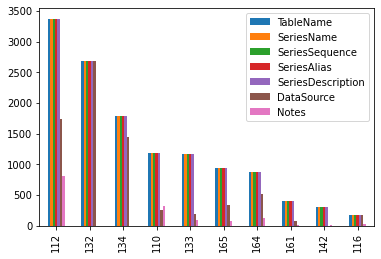

In [33]:
dg = df.groupby(by=['UnitDescription', 'Frequency'], as_index=False).count().sort_values(by=['TableName'],ascending=False).head(10)
dg.plot.bar()

In [29]:
plt.plot(dg.UnitDescription, dg.Frequency)

AttributeError: 'DataFrame' object has no attribute 'UnitDescription'

In [7]:
sql_query = """SELECT * FROM Fact"""
cursor = con.cursor()
cursor.execute(sql_query)
list_of_tables = cursor.fetchall()
list_of_tables

[('TipoCambioEuro',),
 ('MercadosInternacionales',),
 ('TipoInteres',),
 ('ZonaEuro',),
 ('MercadoDinero',),
 ('TiposLegales',),
 ('TiposReferencia',),
 ('TiposHogares',),
 ('TiposSaldosVivos',),
 ('NuevasOperaciones',)]

In [357]:
numcolumns = 0

for table in list_of_tables:
    df = pd.read_sql_query(f"SELECT * from {table[0]}", con, index_col='fecha')
    numcolumns += df.shape[1]
numcolumns

211

In [217]:
con.close()

In [356]:
list_of_tables[0][0]

'TipoCambioEuro'

# Load / Plot

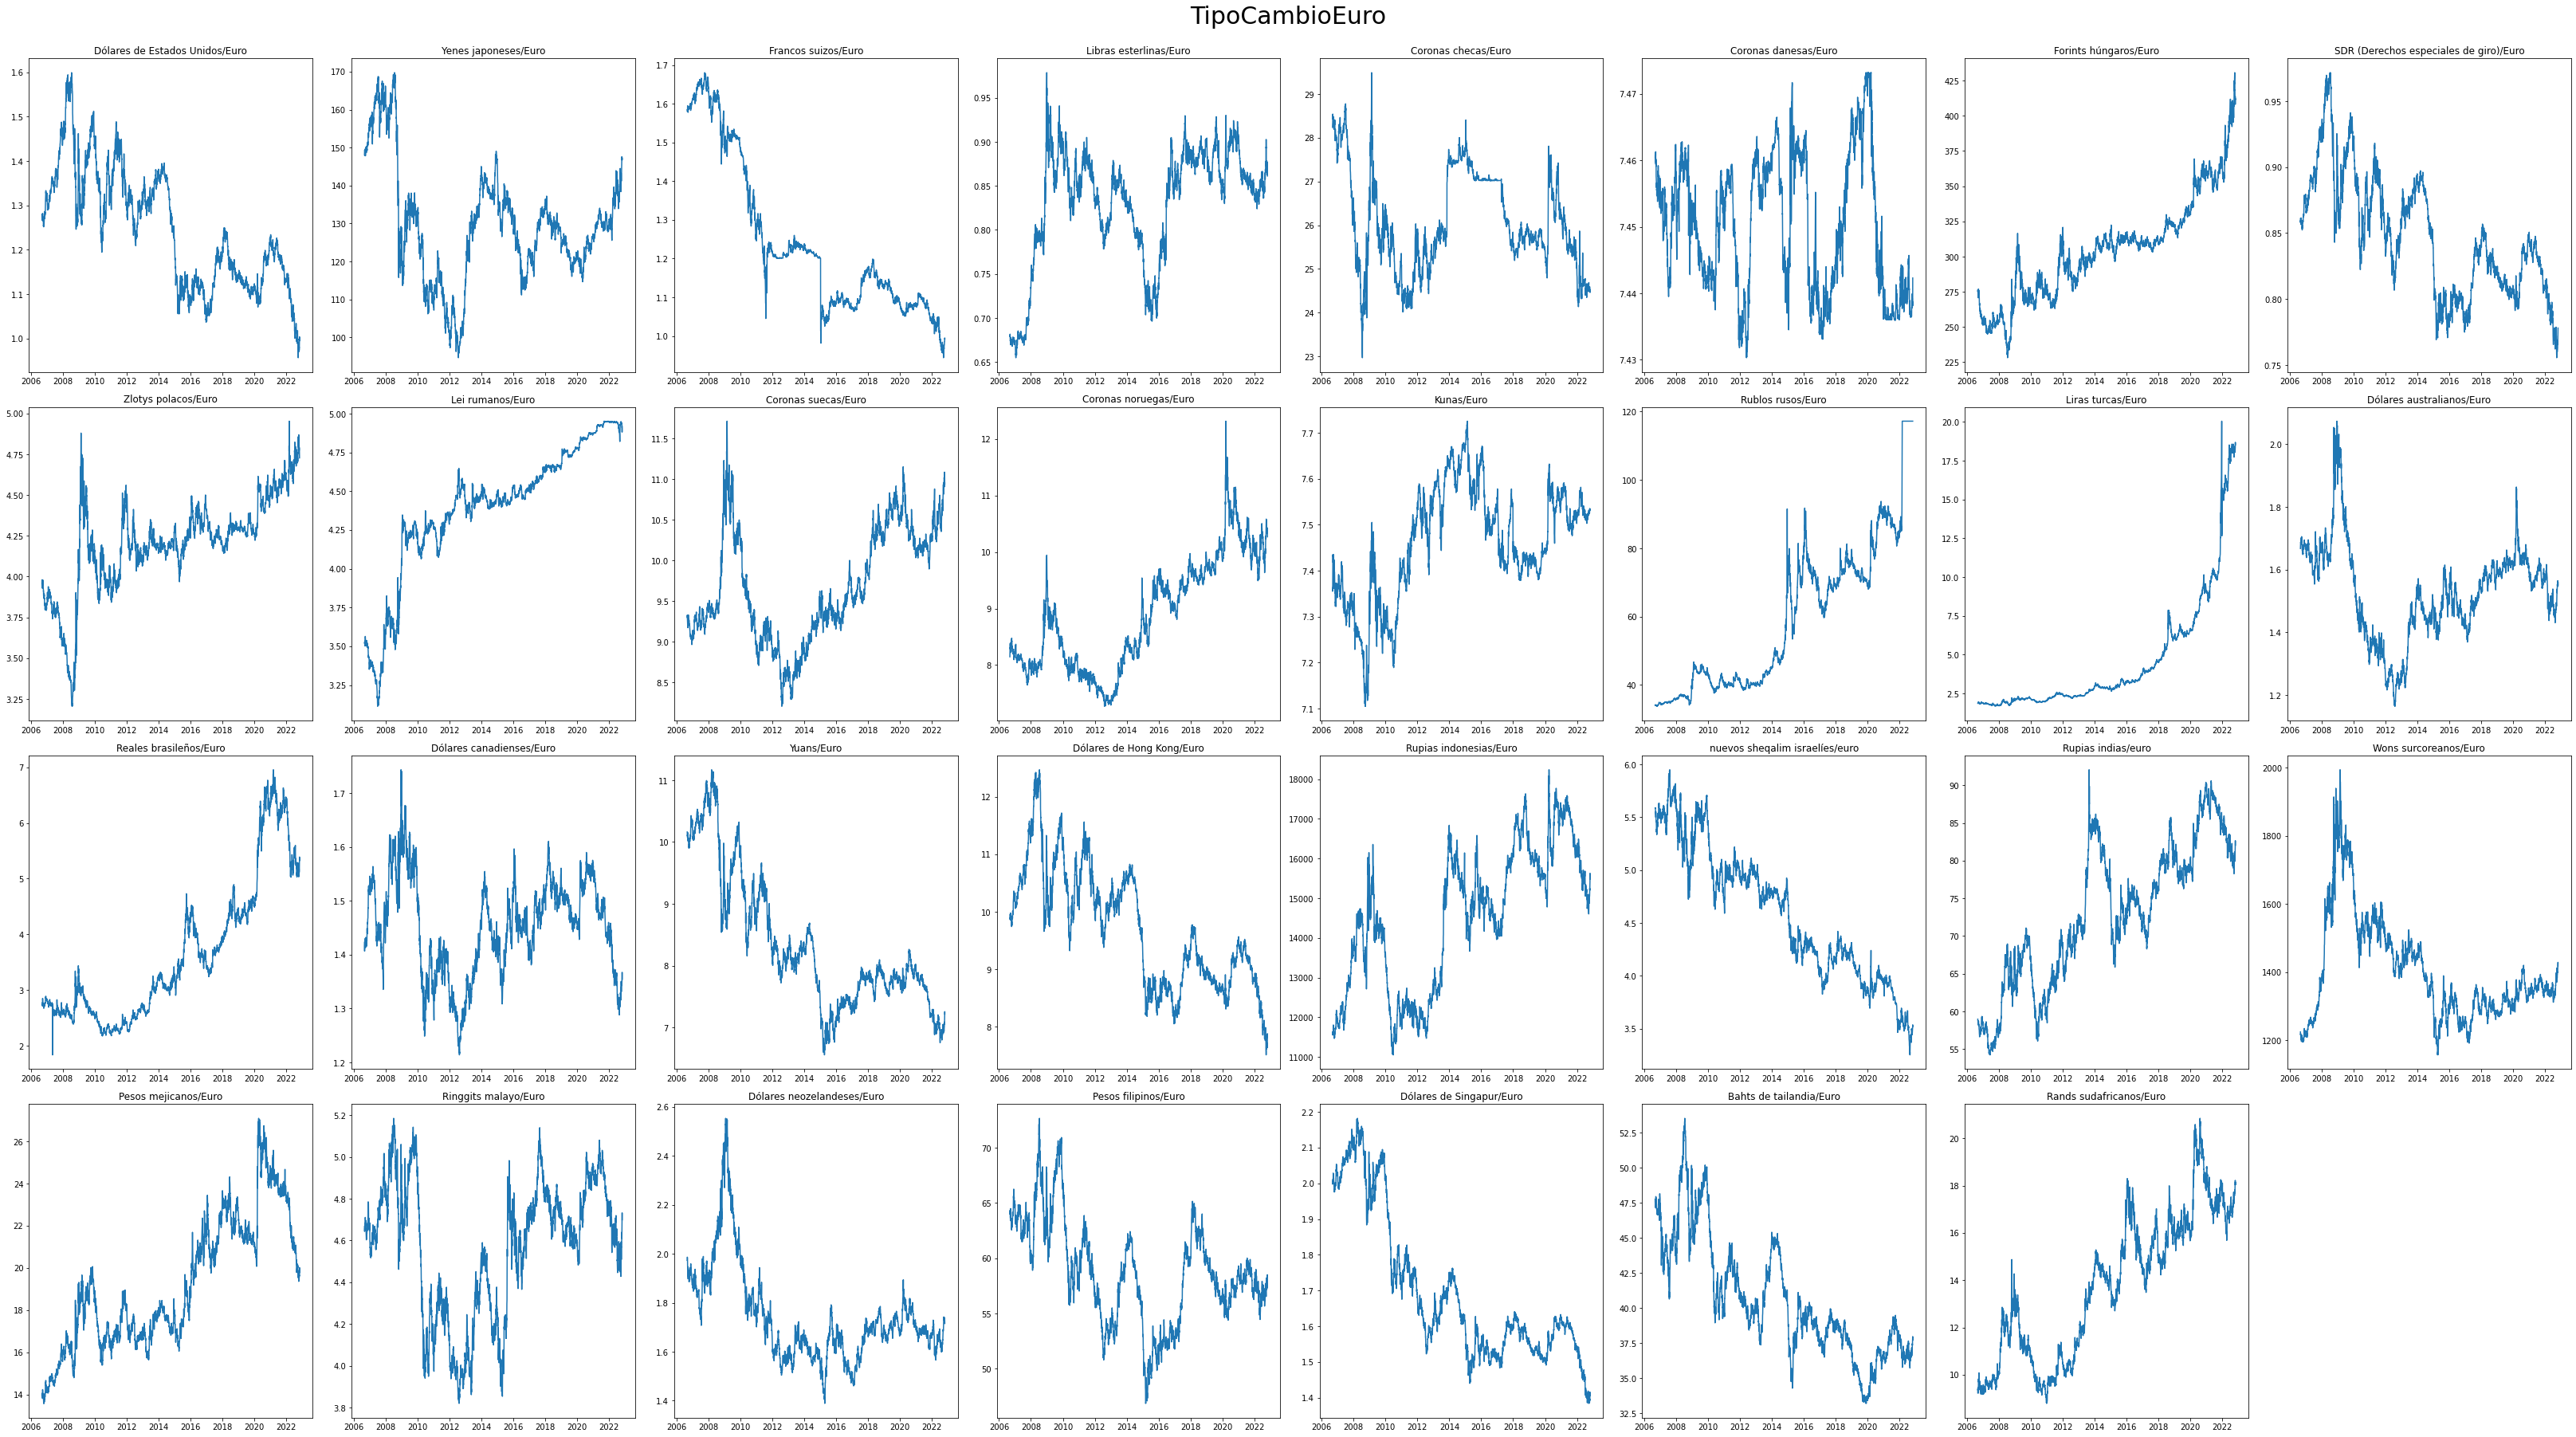

In [492]:
# Transform & Load
df = get_financial_df(con, 'TipoCambioEuro')
grid_plot(df, x=df.index, columns=df.columns, width=25, table='TipoCambioEuro')

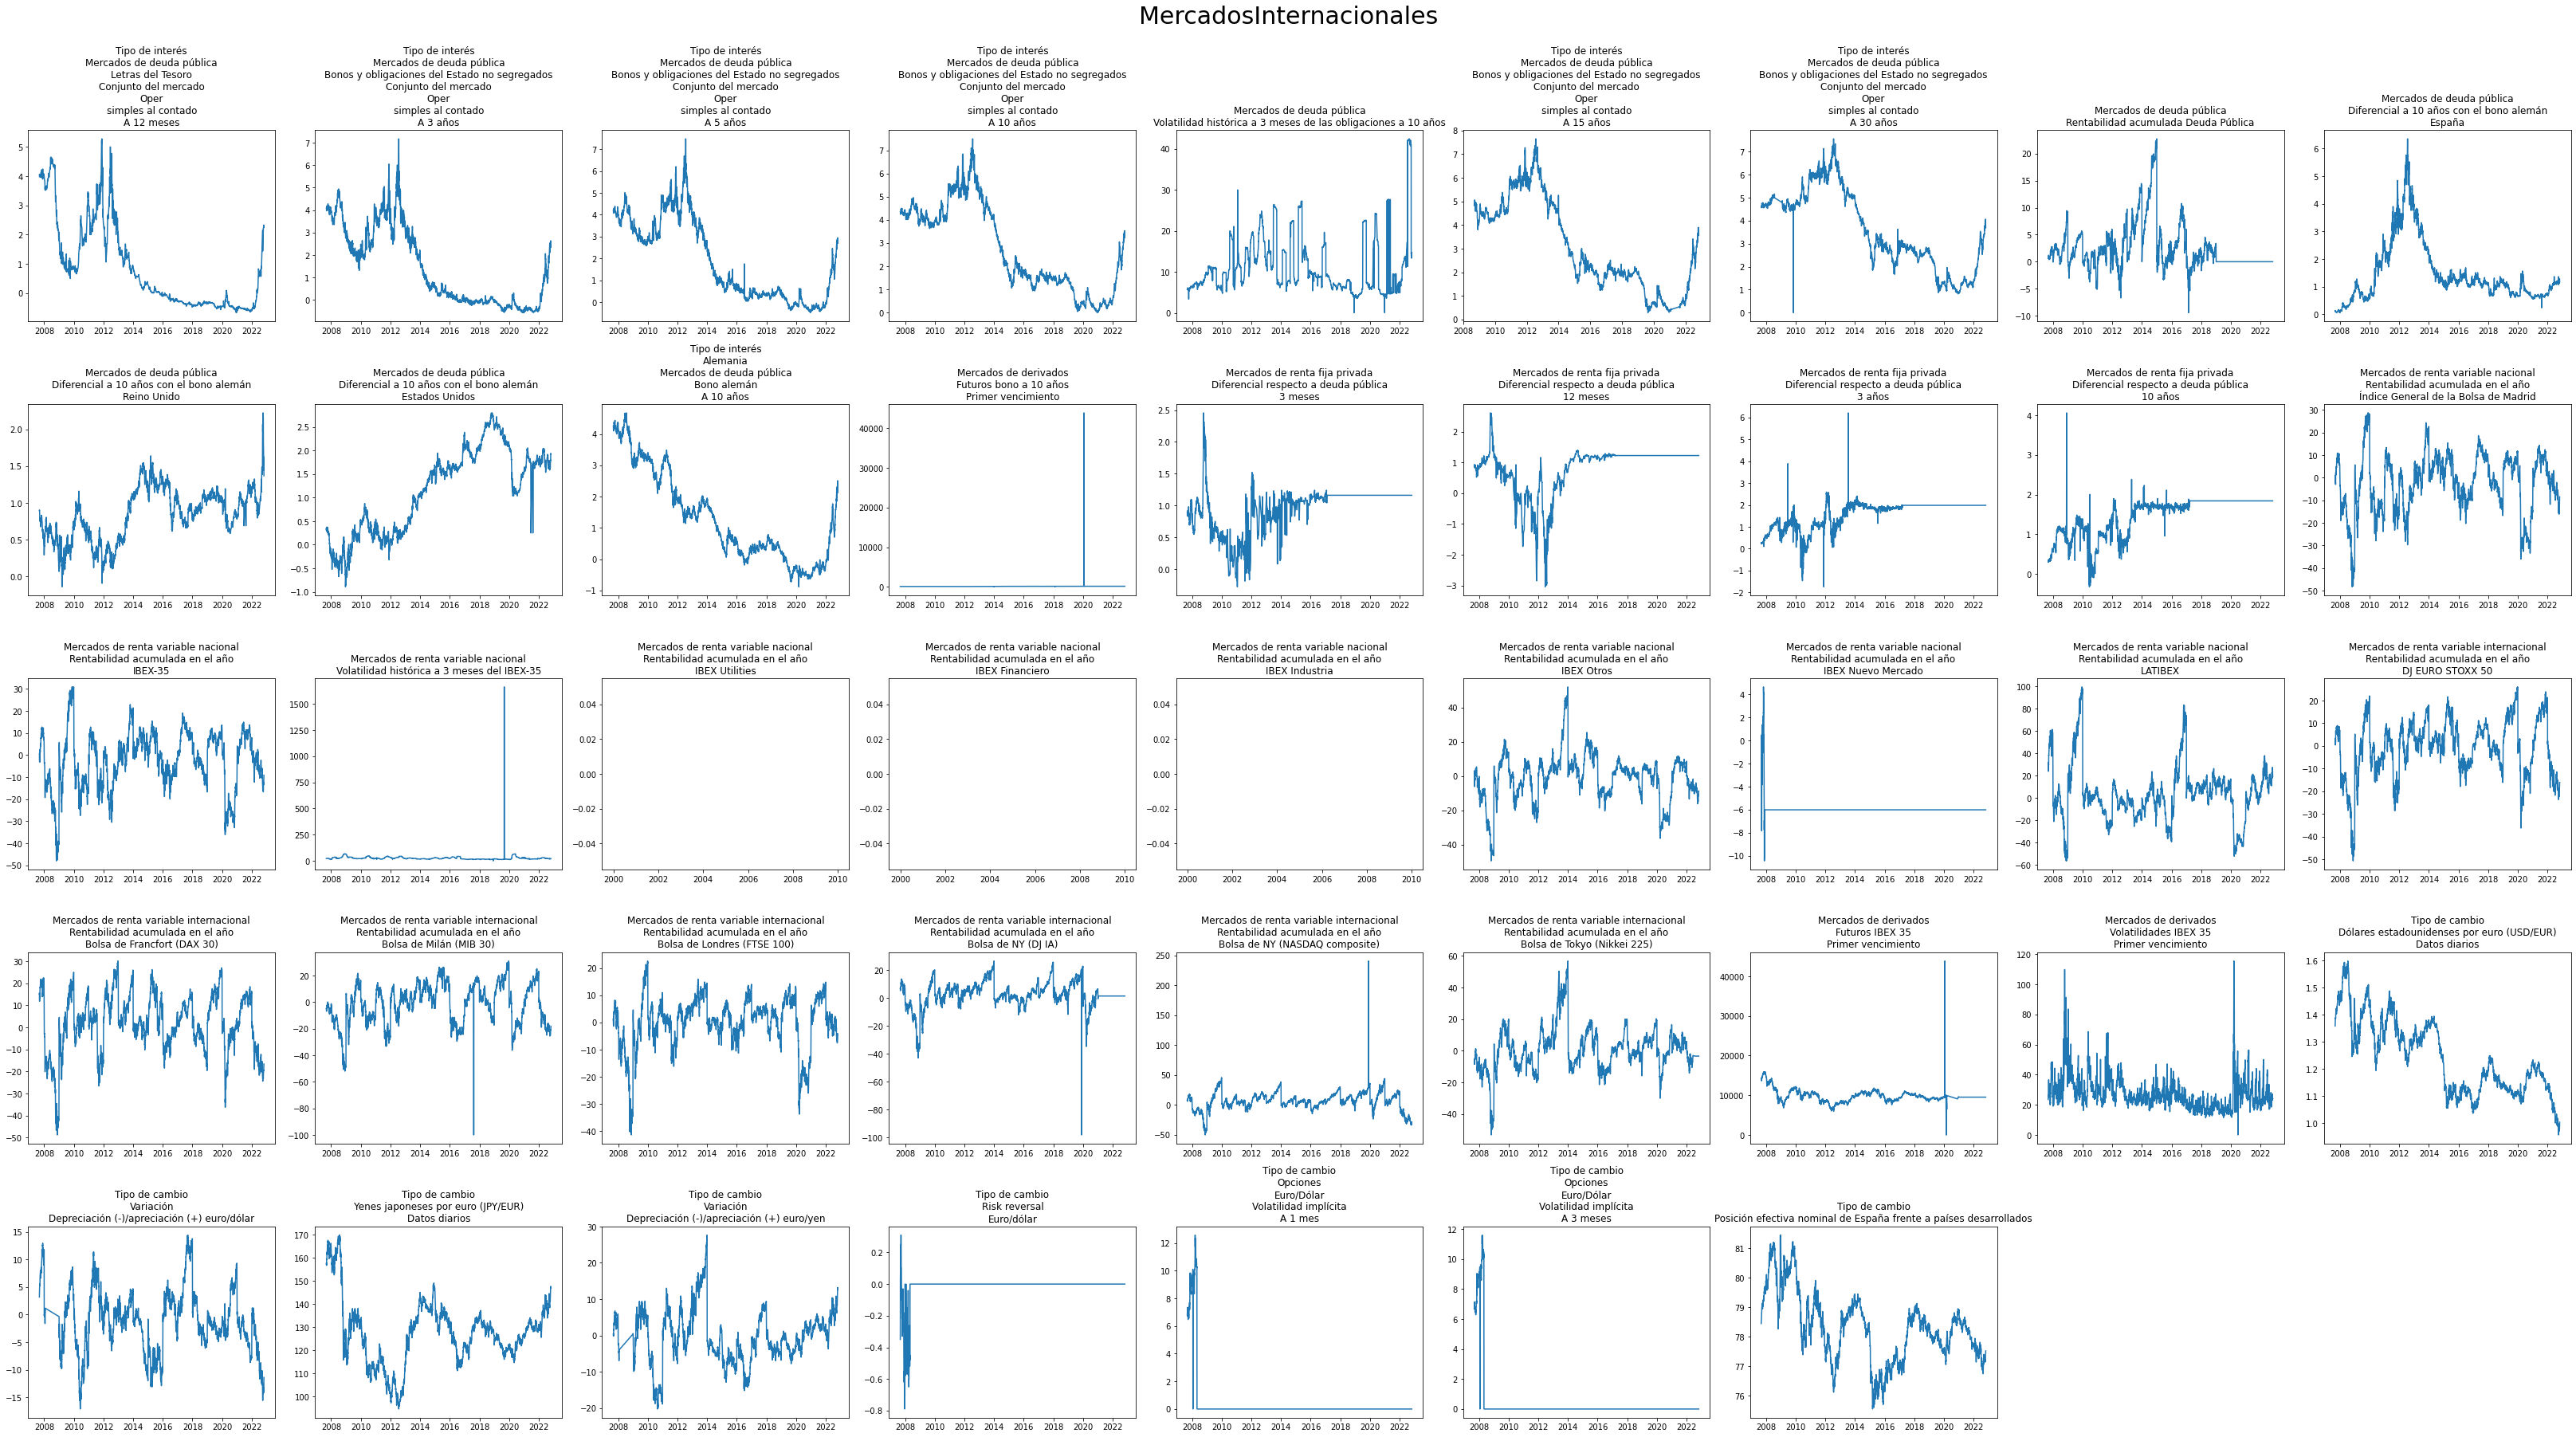

In [493]:
# Transform & Load
df = get_financial_df(con, 'MercadosInternacionales')
grid_plot(df, x=df.index, columns=df.columns, width=25, table='MercadosInternacionales')

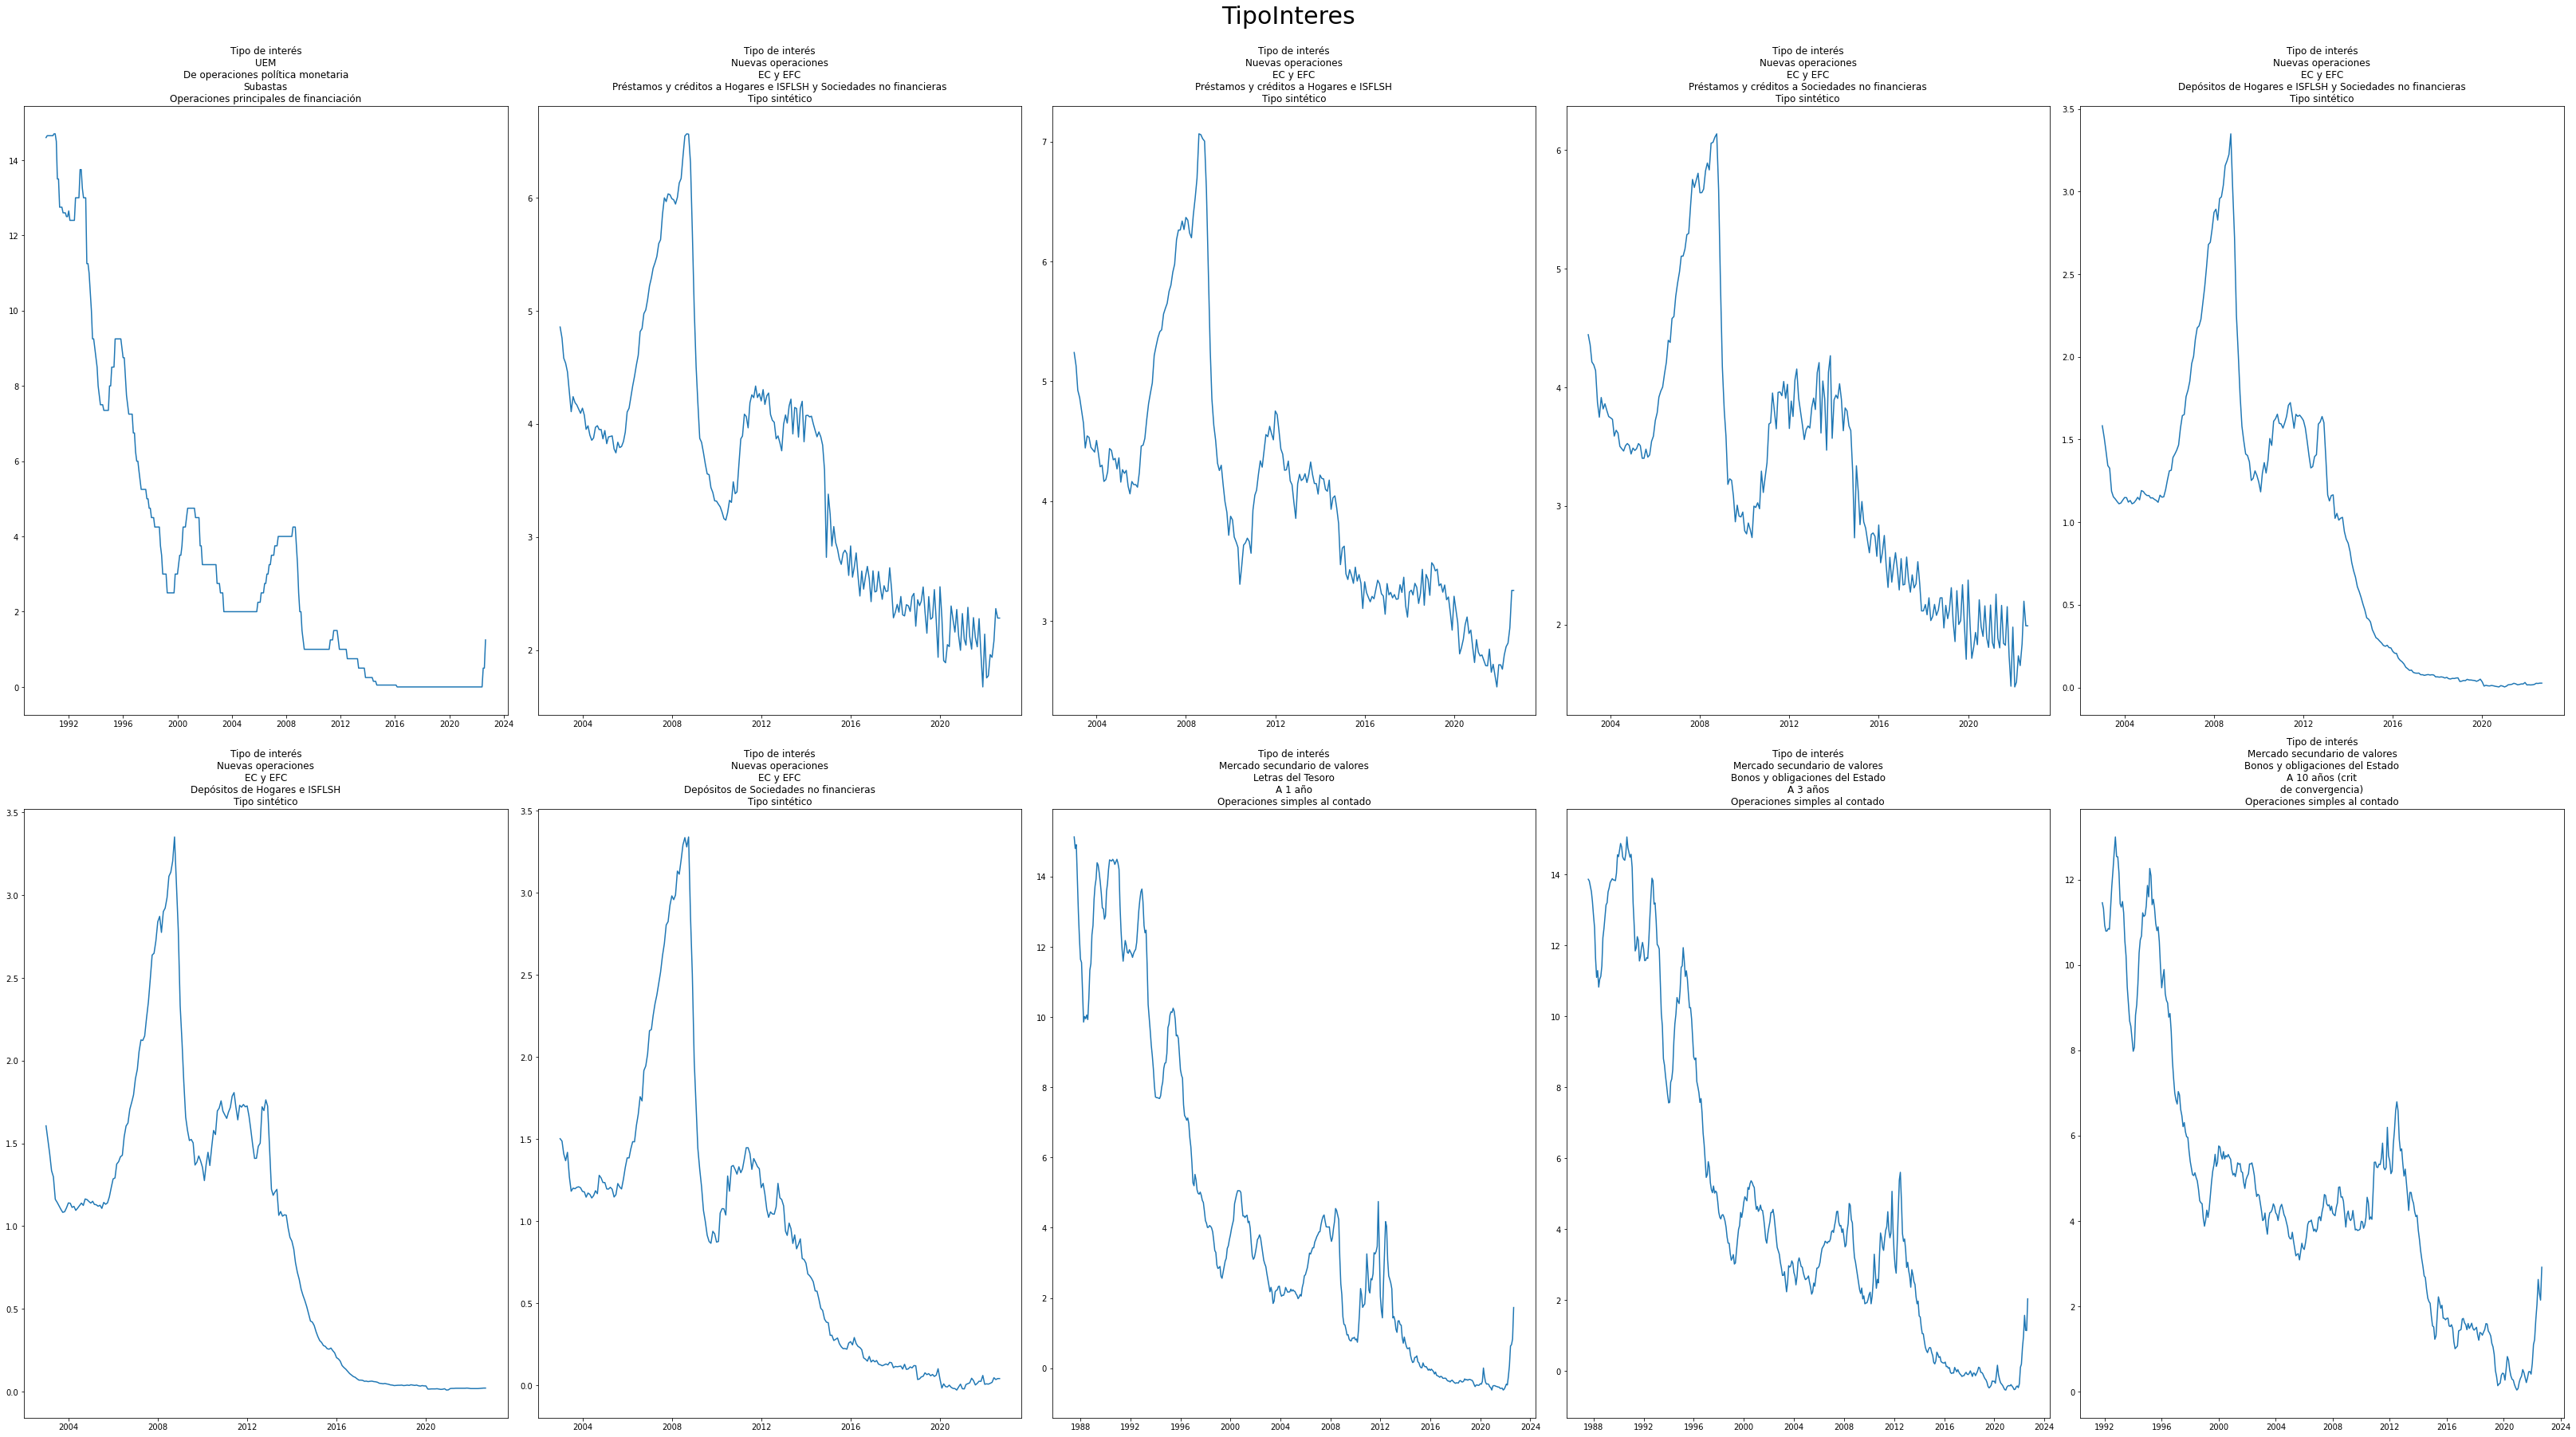

In [515]:
# Transform & Load
df = get_financial_df(con, 'TipoInteres')
grid_plot(df, x=df.index, columns=df.columns, width=25, table='TipoInteres')

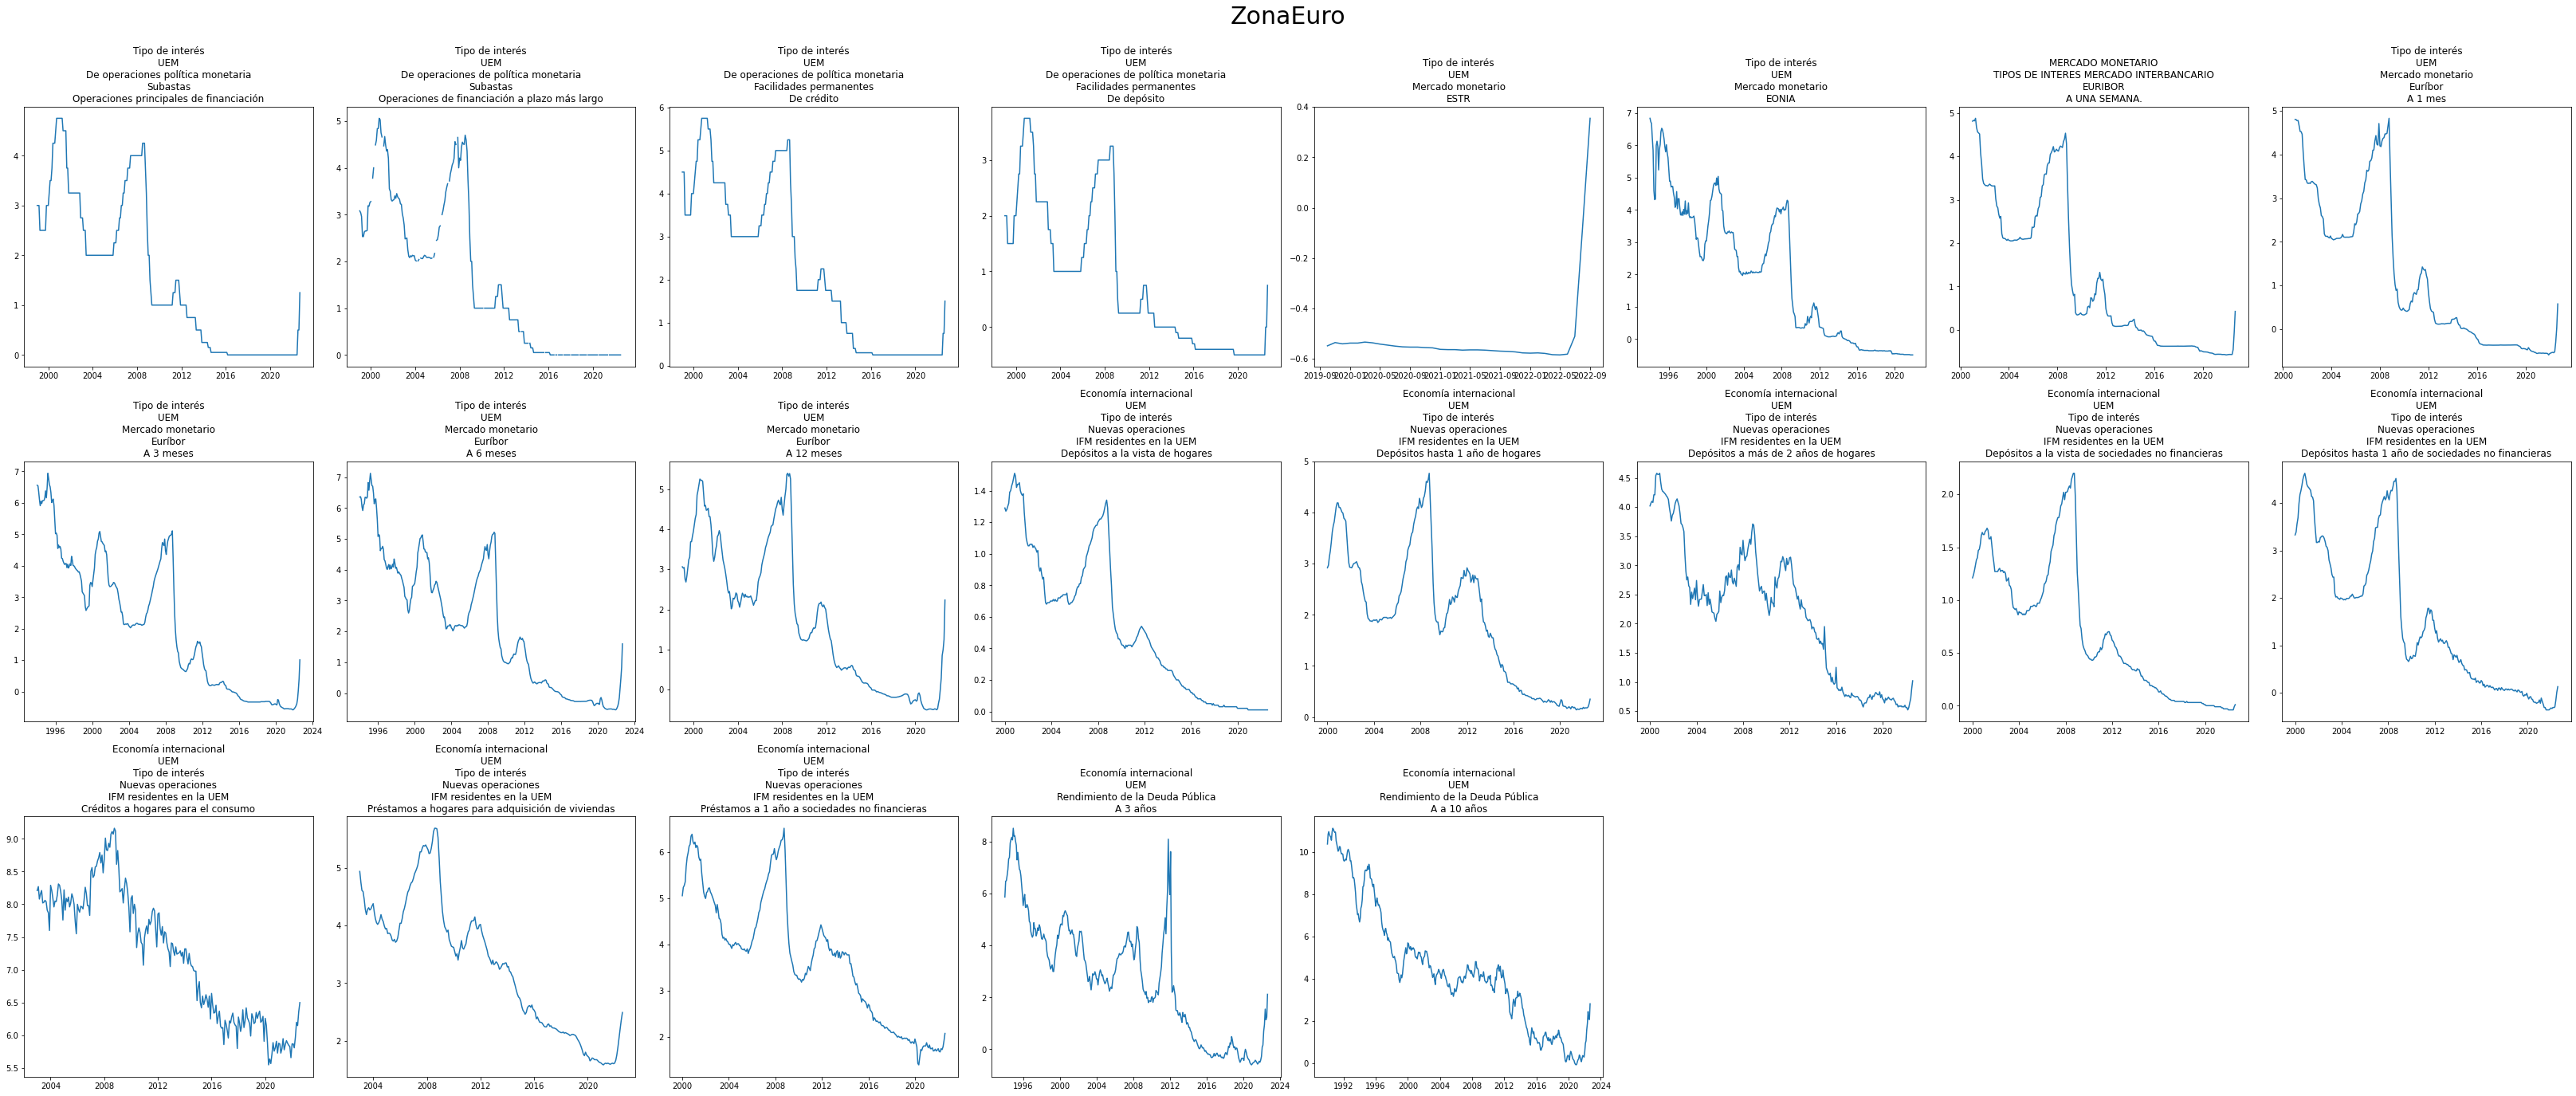

In [516]:
# Transform & Load
df = get_financial_df(con, 'ZonaEuro')
grid_plot(df, x=df.index, columns=df.columns, width=25, table='ZonaEuro')

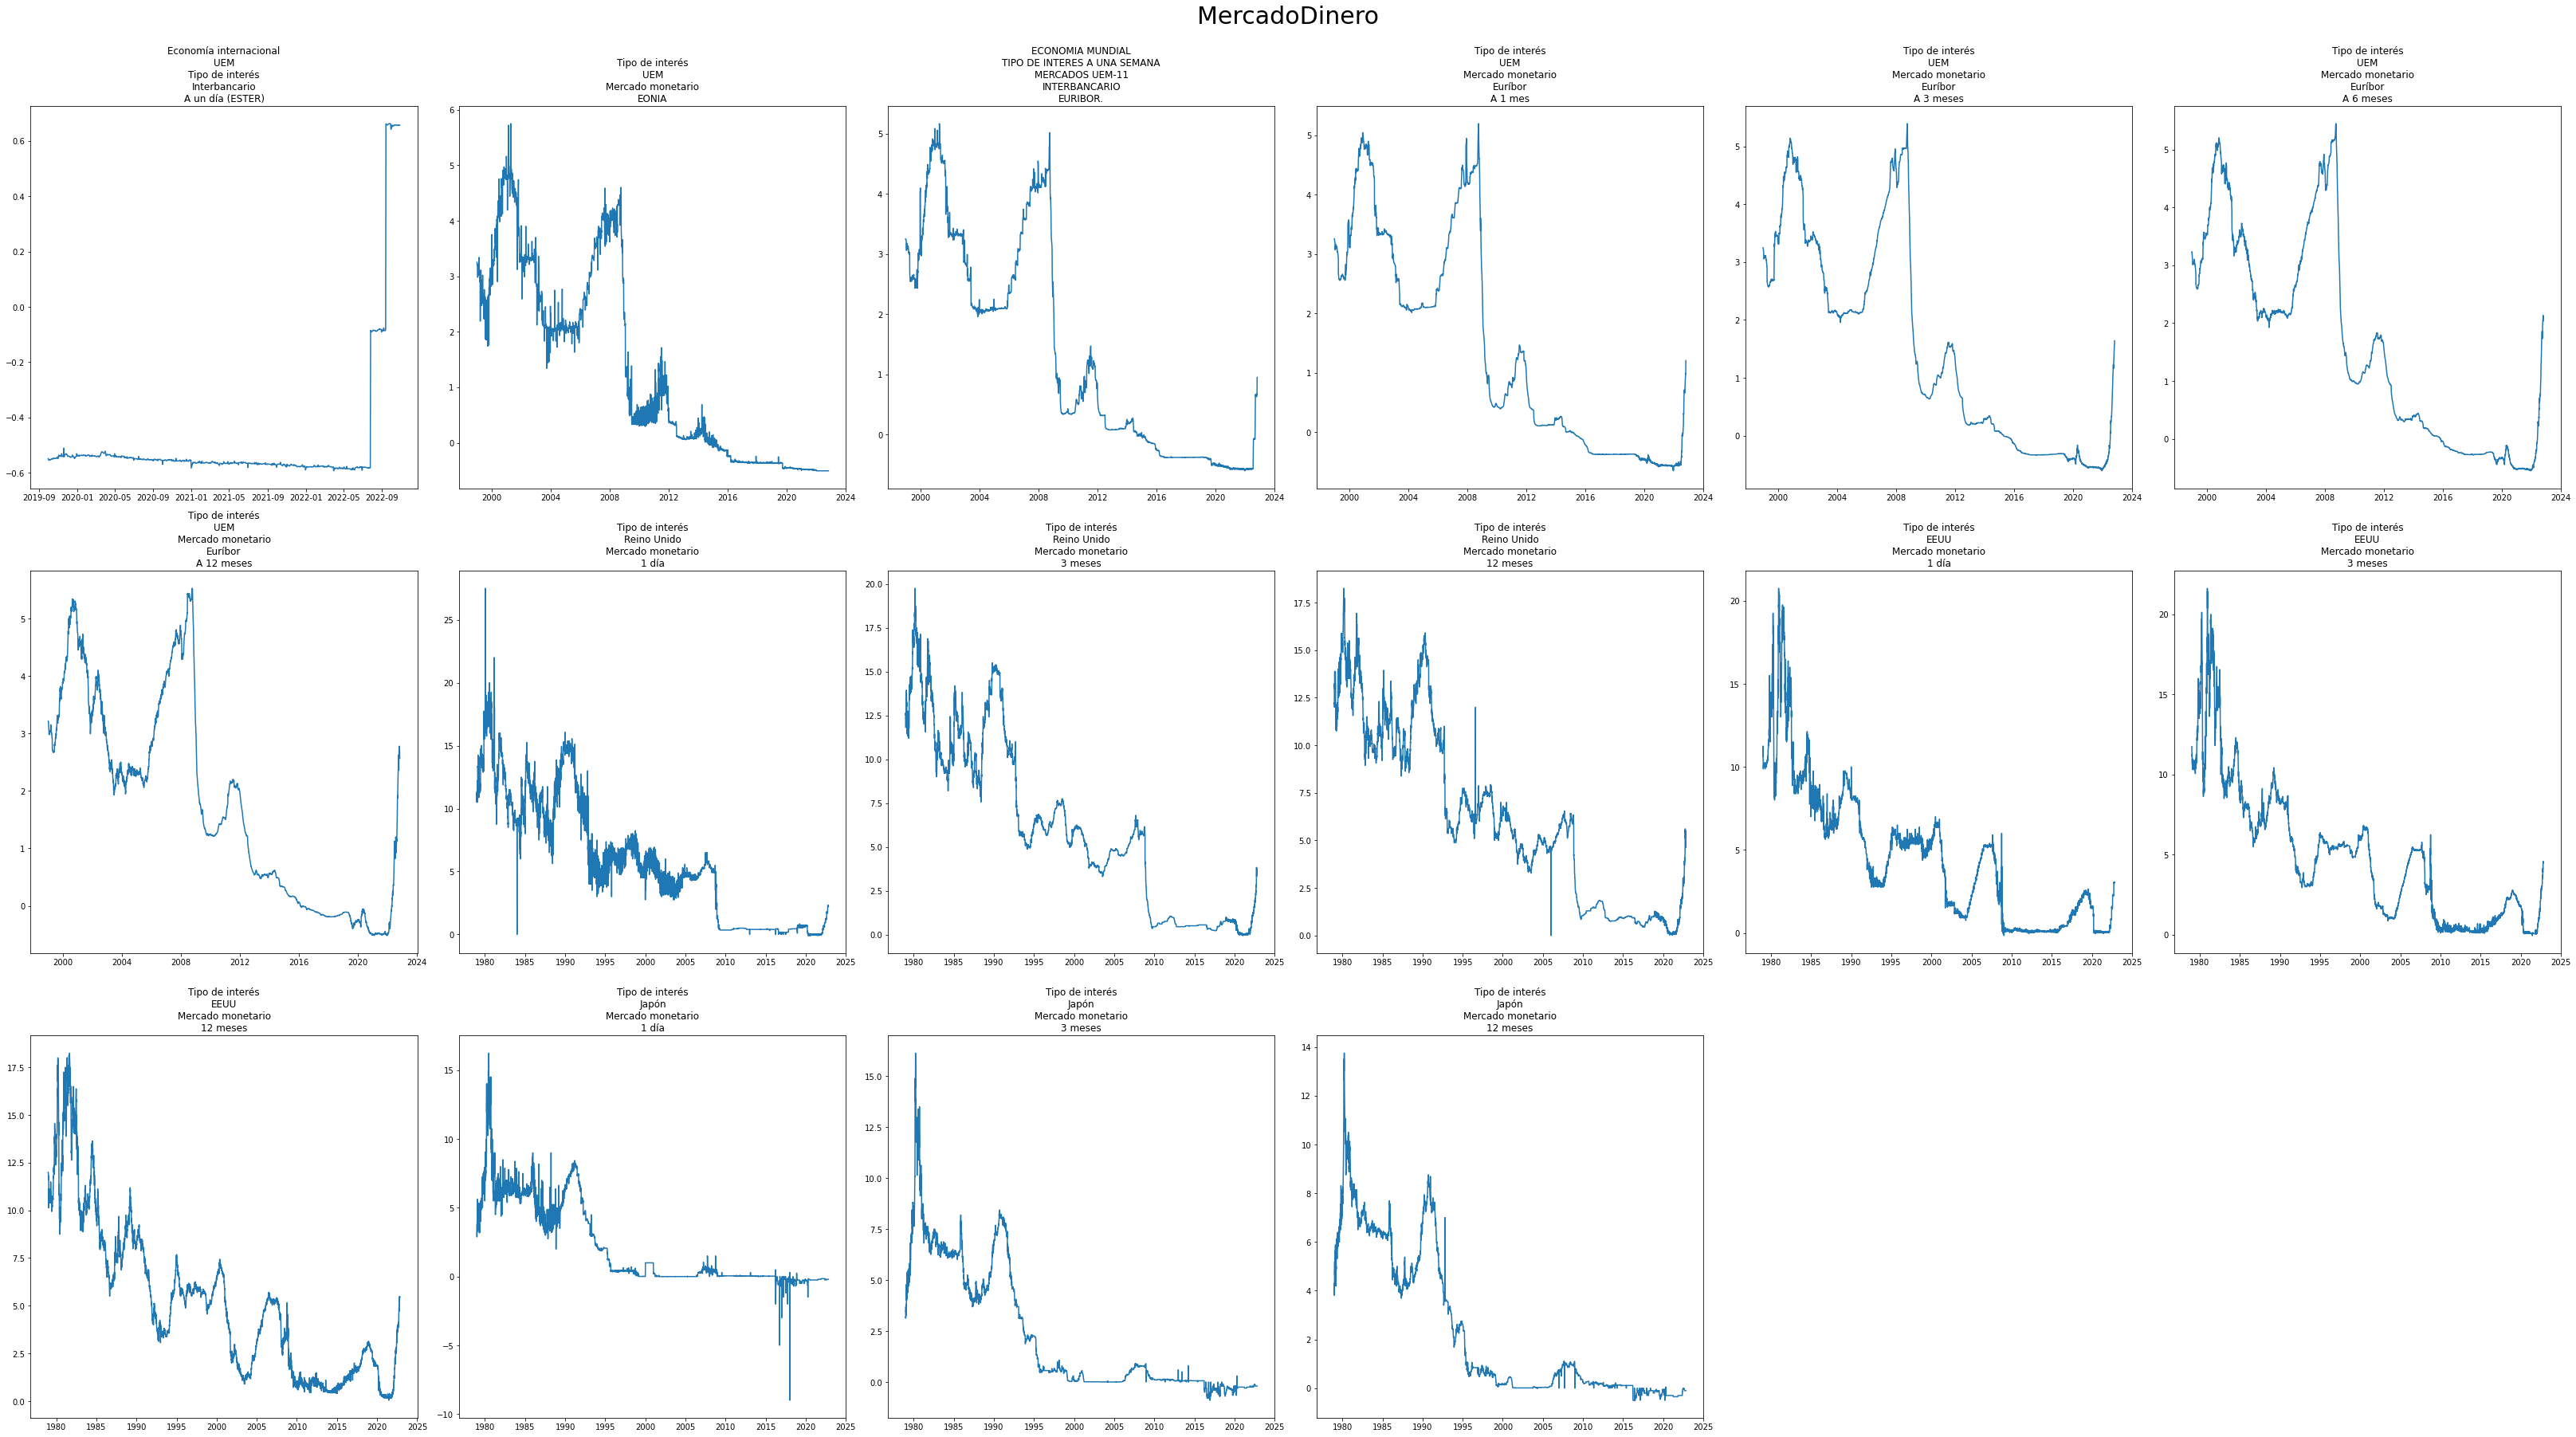

In [517]:
# Transform & Load
df = get_financial_df(con, 'MercadoDinero')
grid_plot(df, x=df.index, columns=df.columns, width=25, table='MercadoDinero')

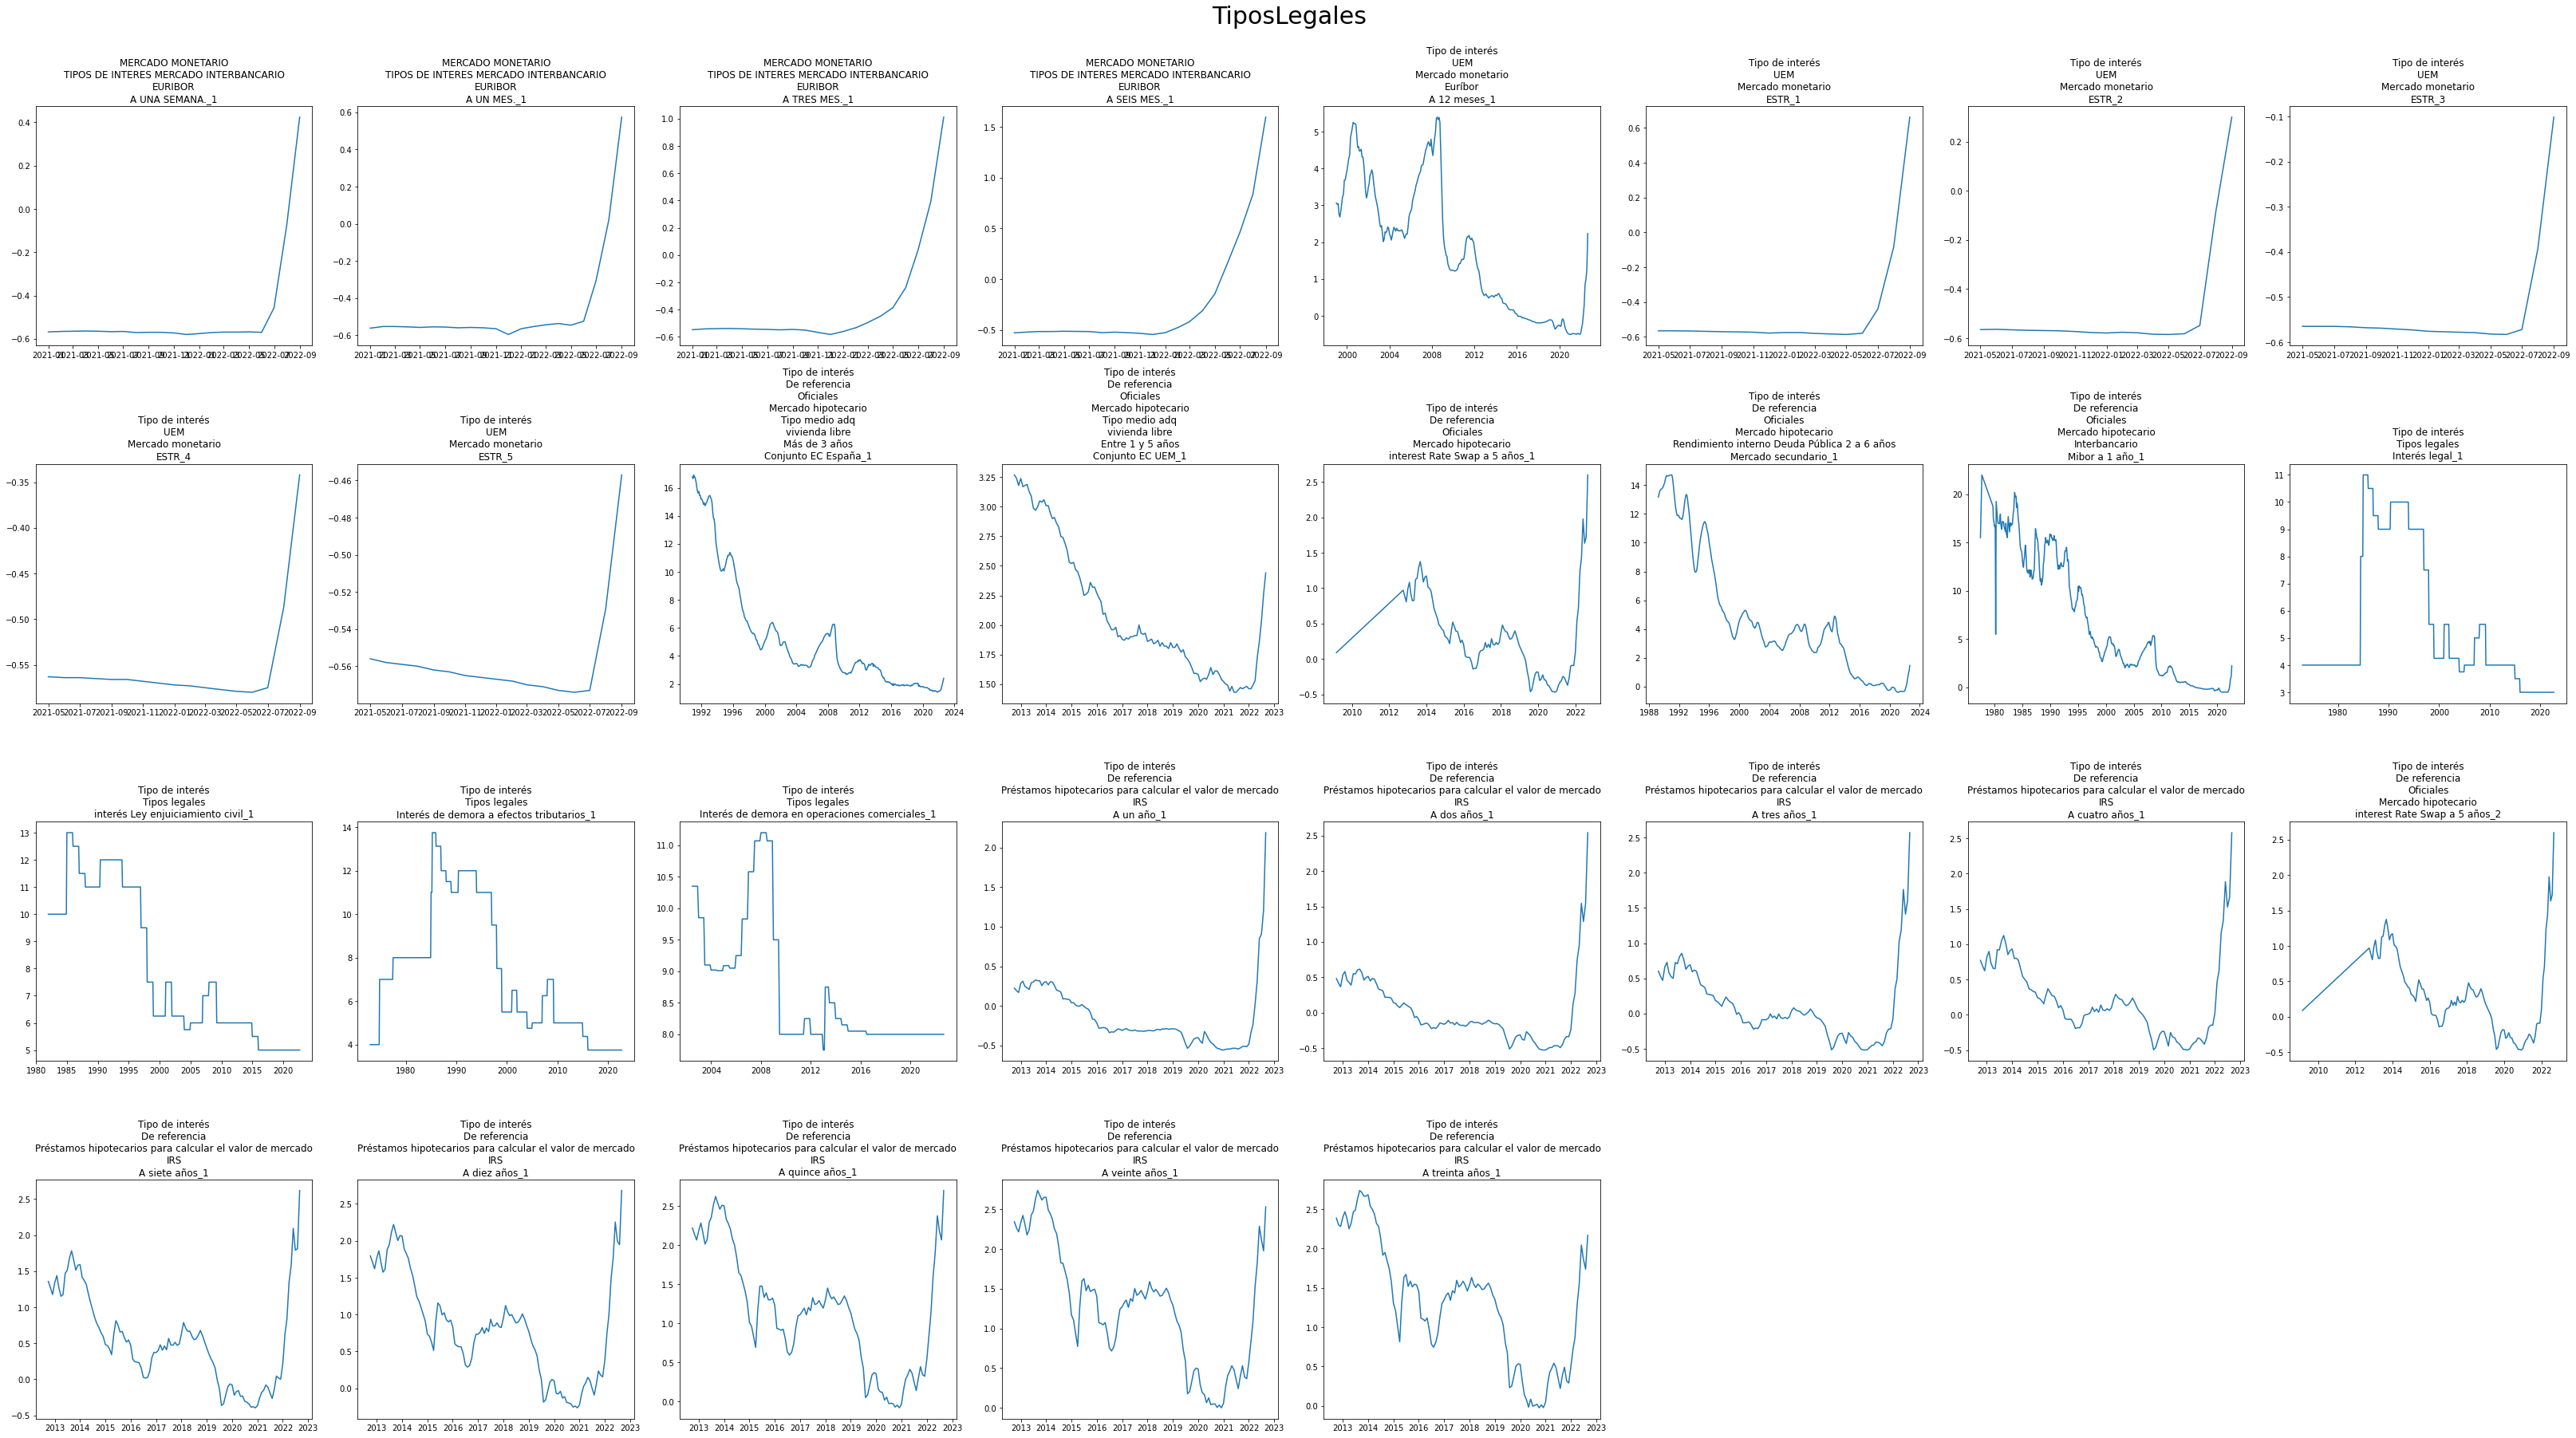

In [518]:
# Transform & Load
df = get_financial_df(con, 'TiposLegales')
grid_plot(df, x=df.index, columns=df.columns, width=25, table='TiposLegales')

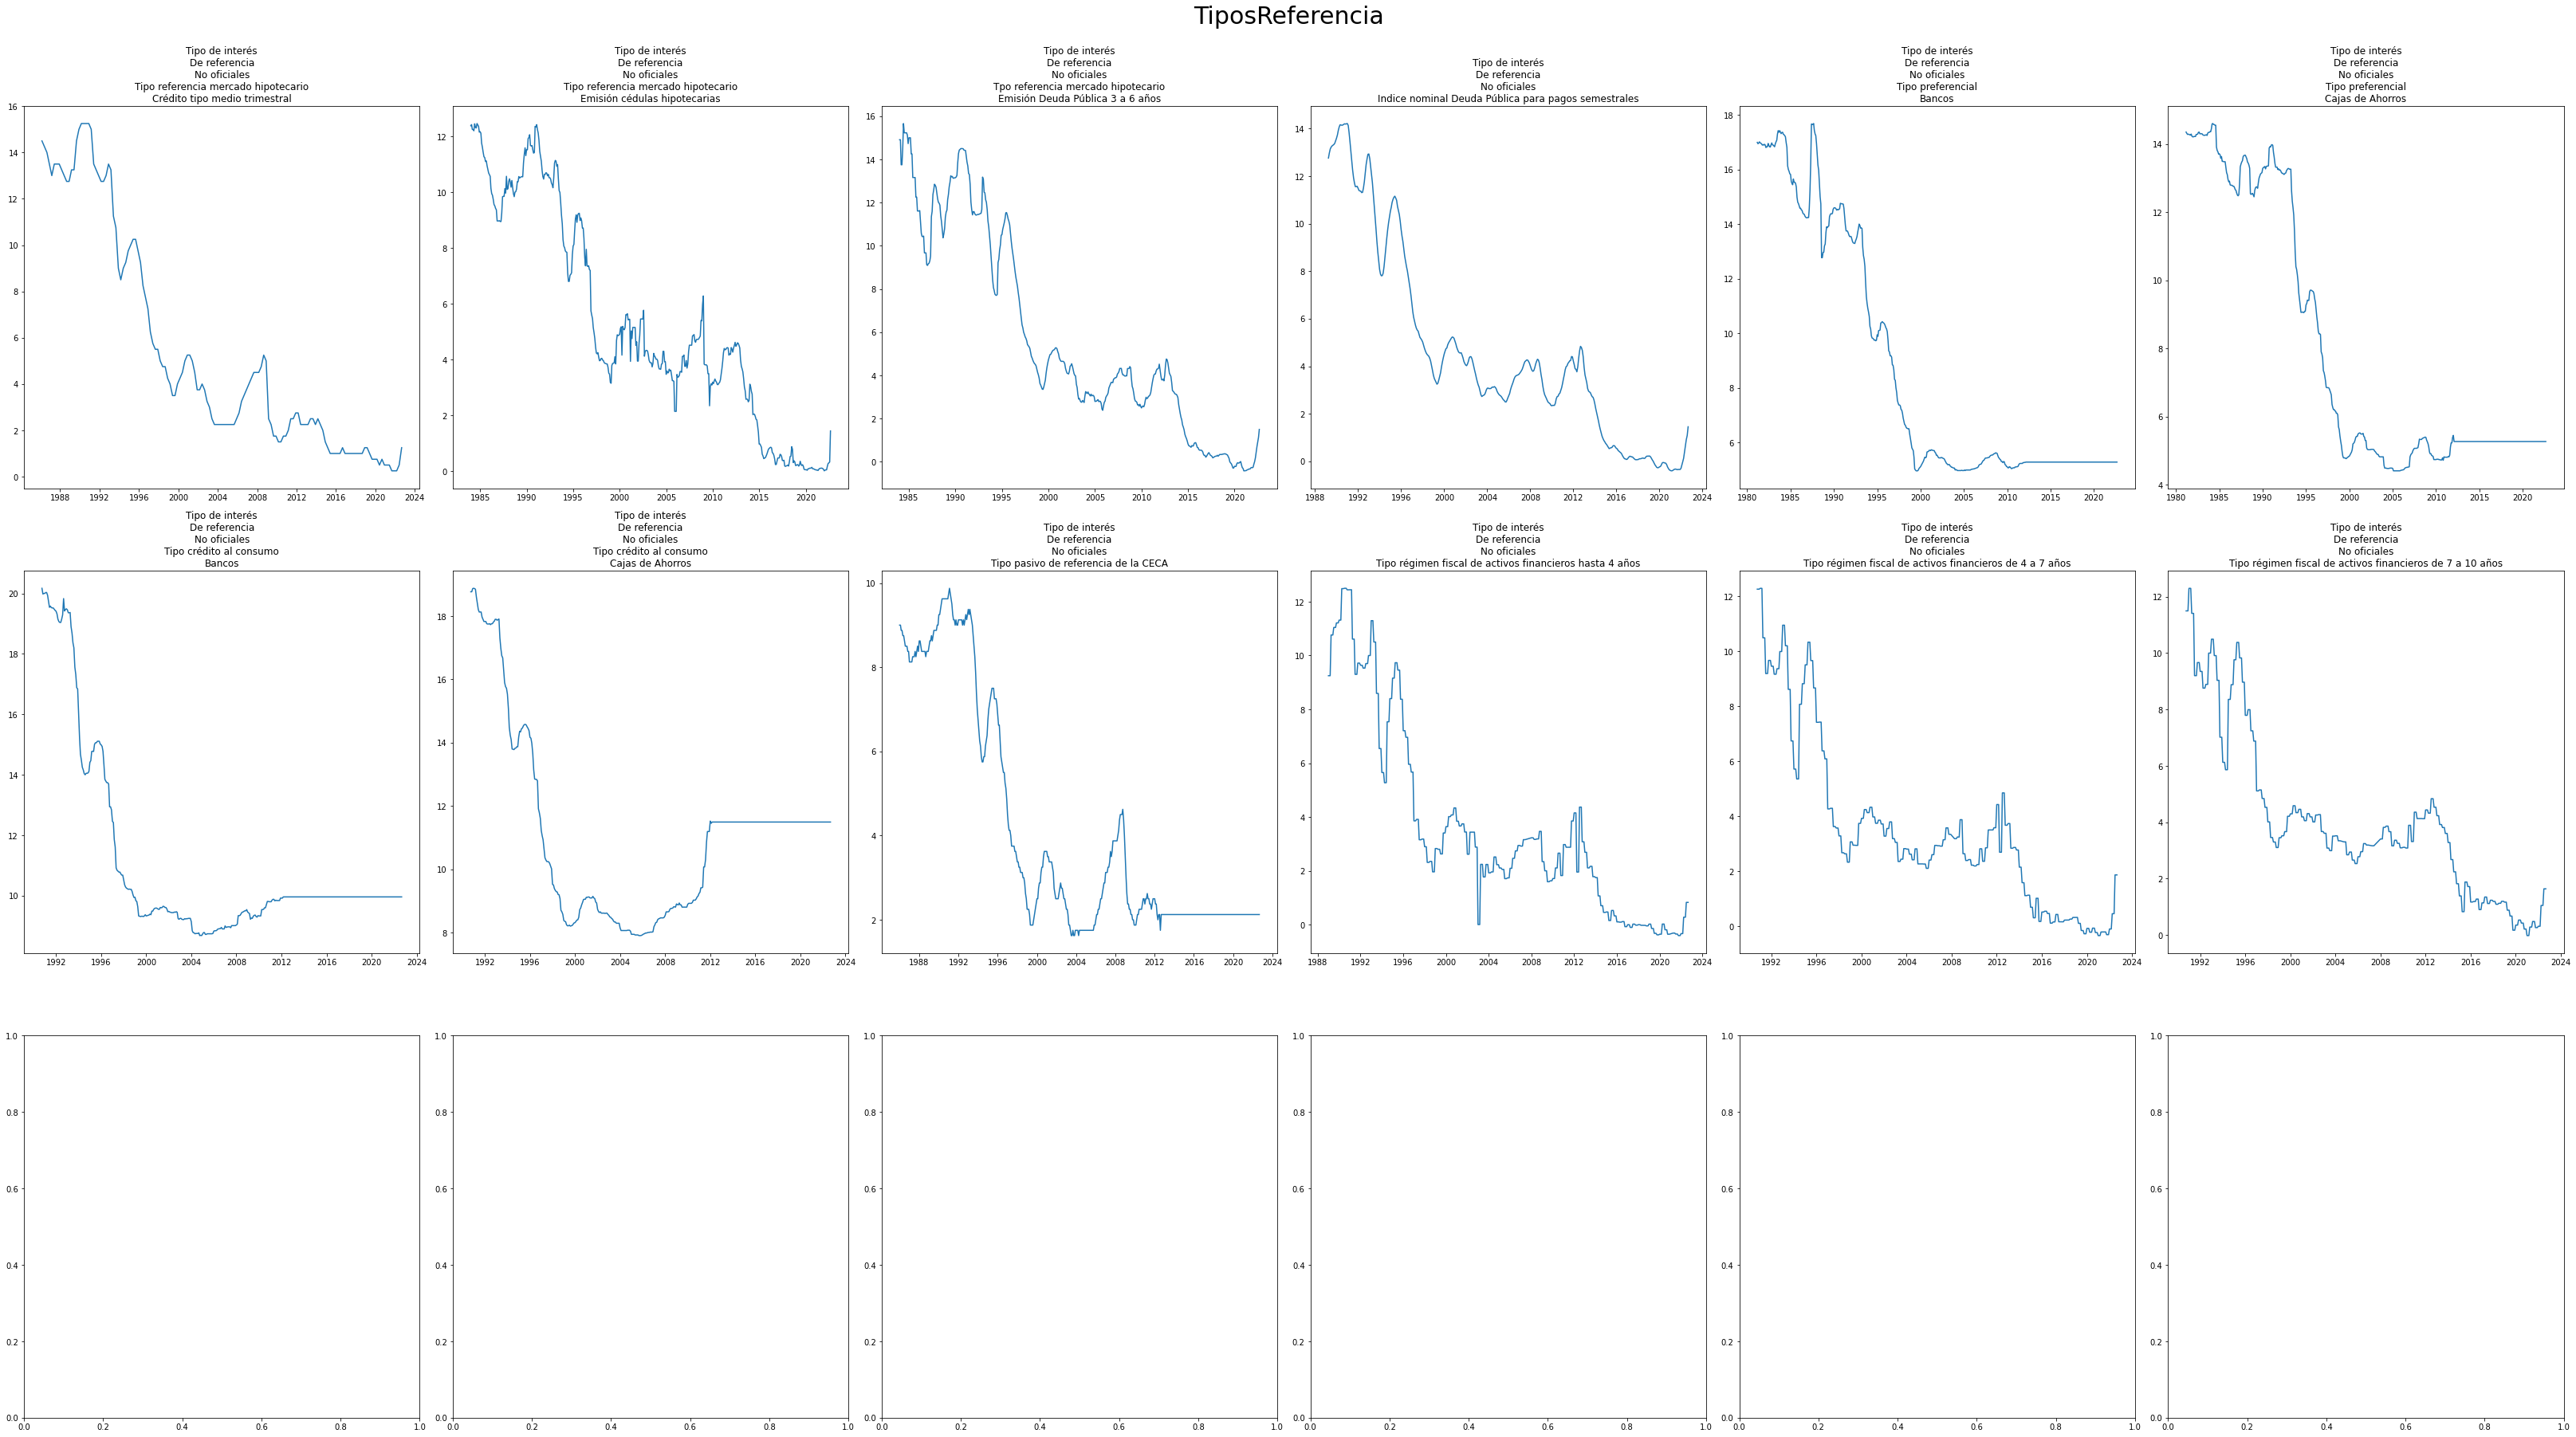

In [13]:
# Transform & Load
df = get_financial_df(con, 'TiposReferencia')
grid_plot(df, x=df.index, columns=df.columns, width=25, table='TiposReferencia')

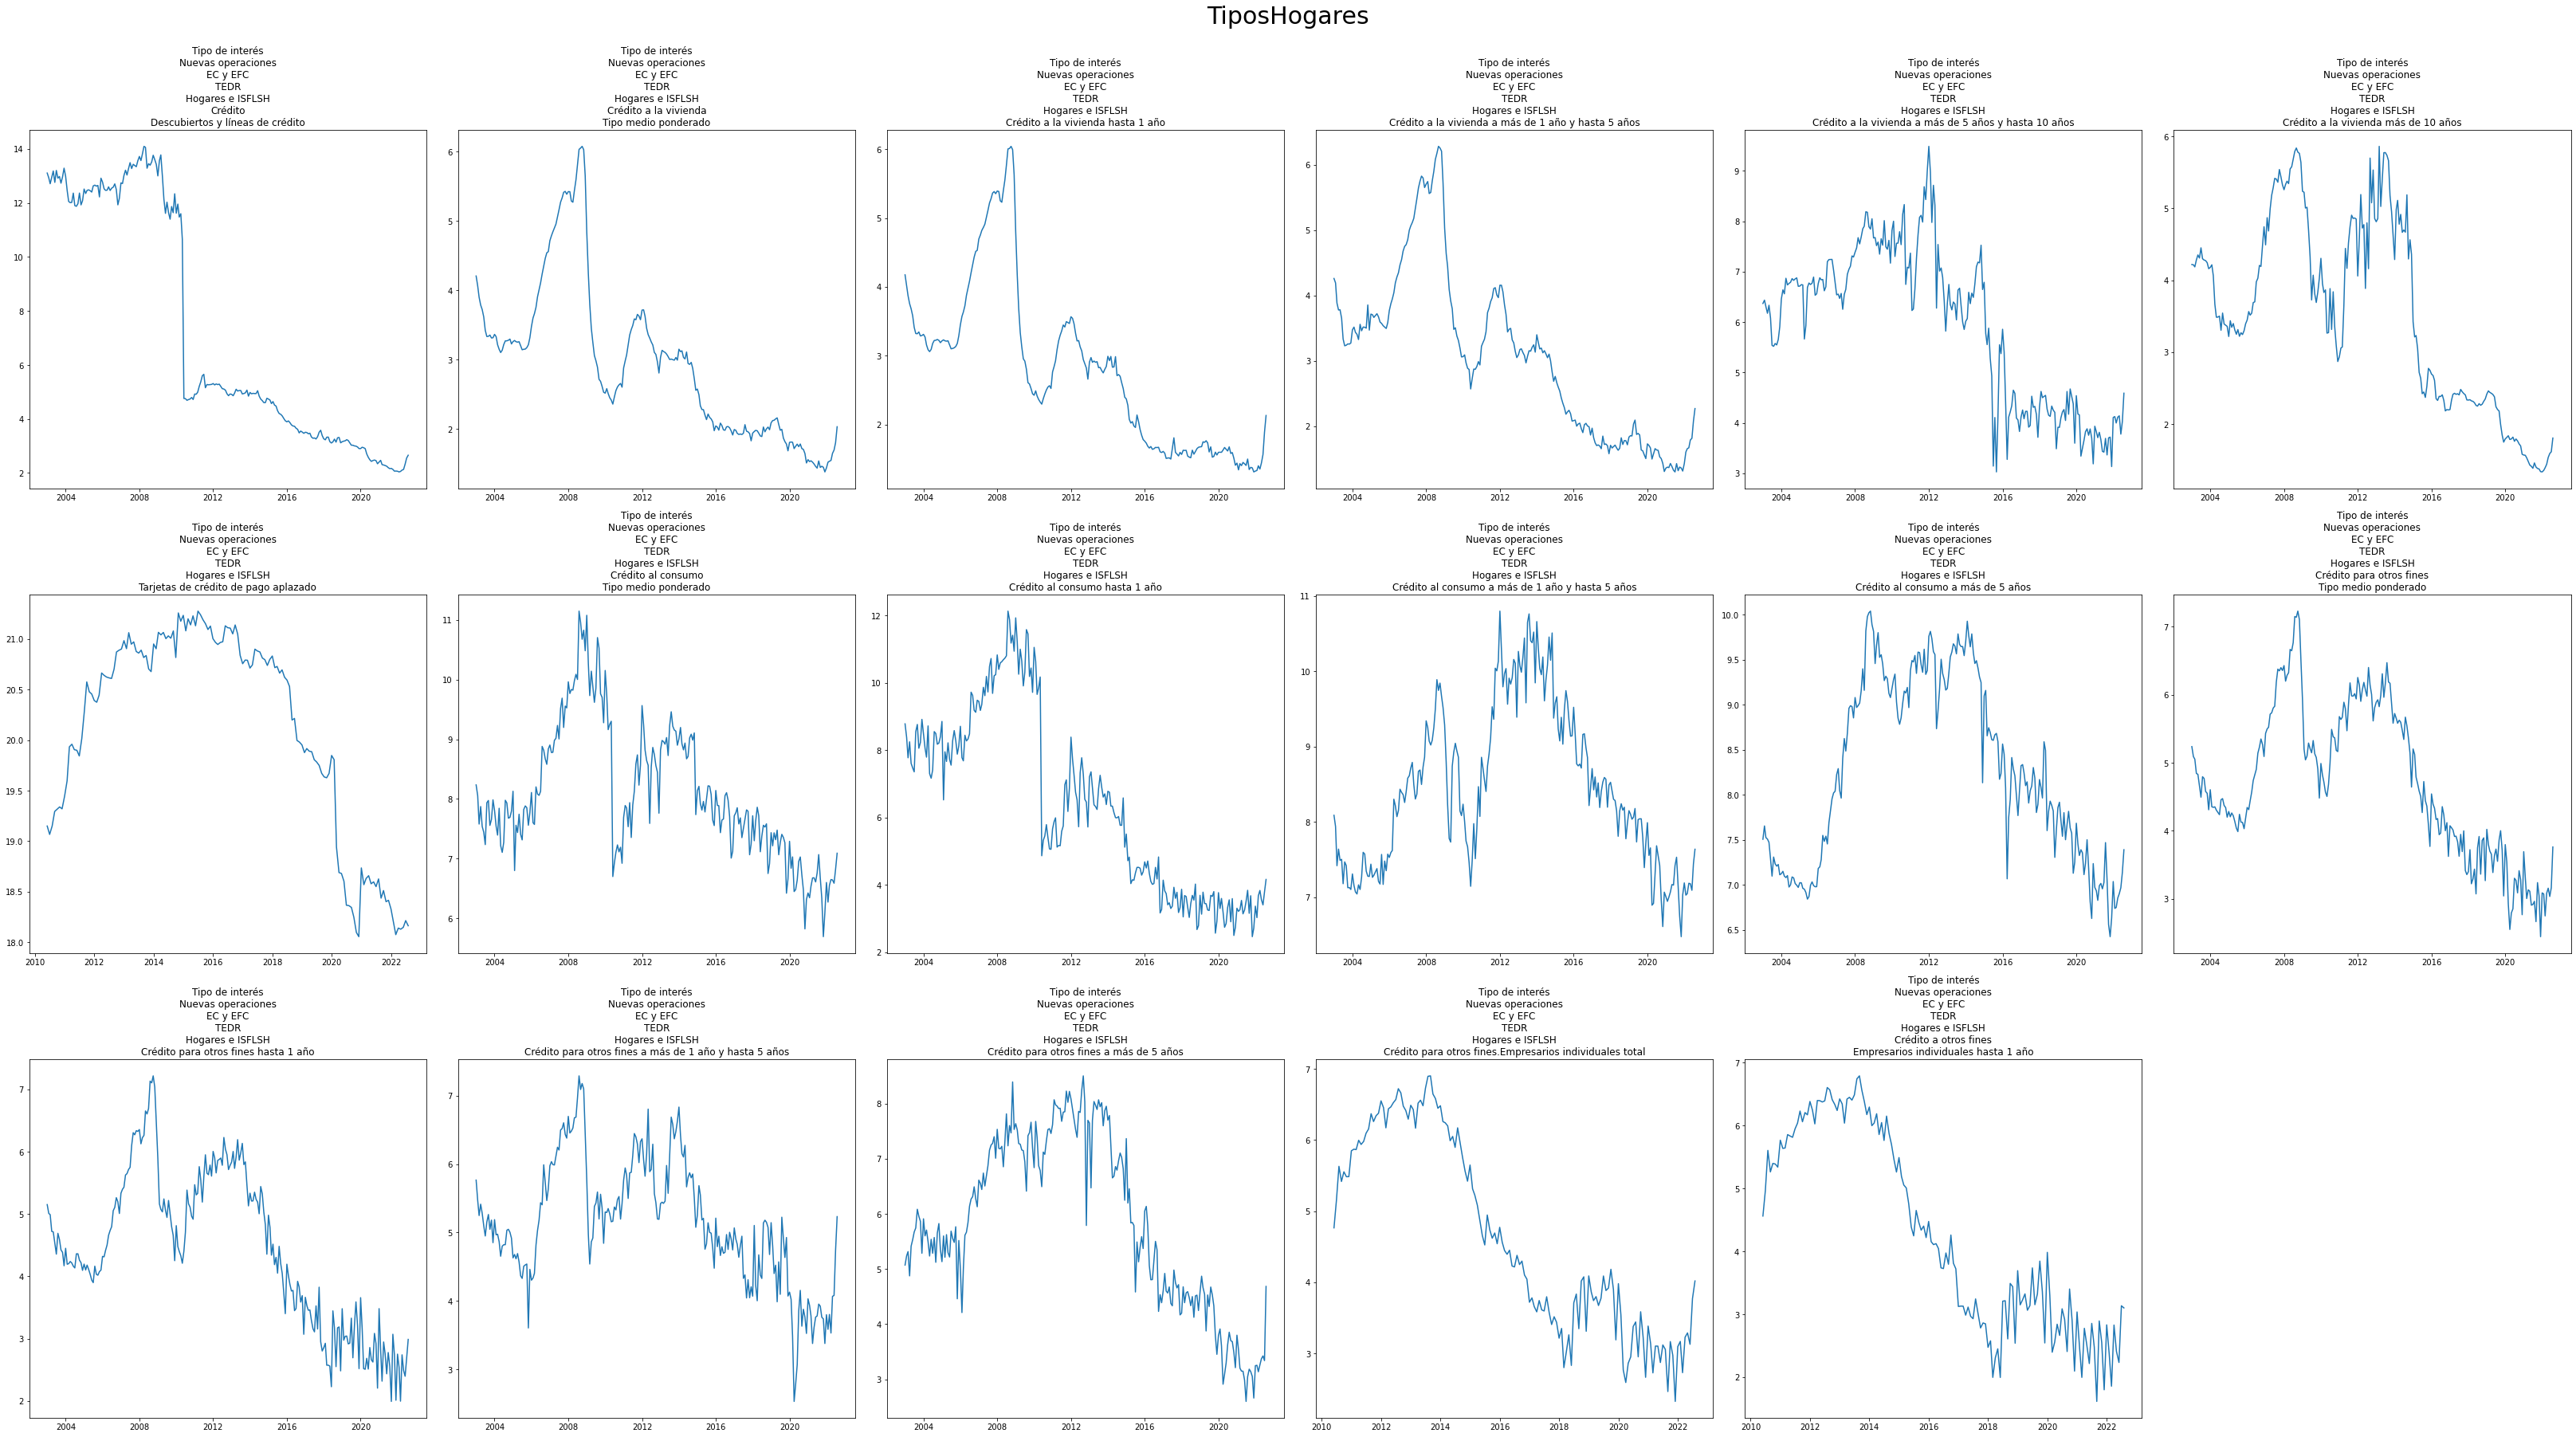

In [499]:
# Transform & Load
df = get_financial_df(con, 'TiposHogares')
grid_plot(df, x=df.index, columns=df.columns, width=25, table='TiposHogares')

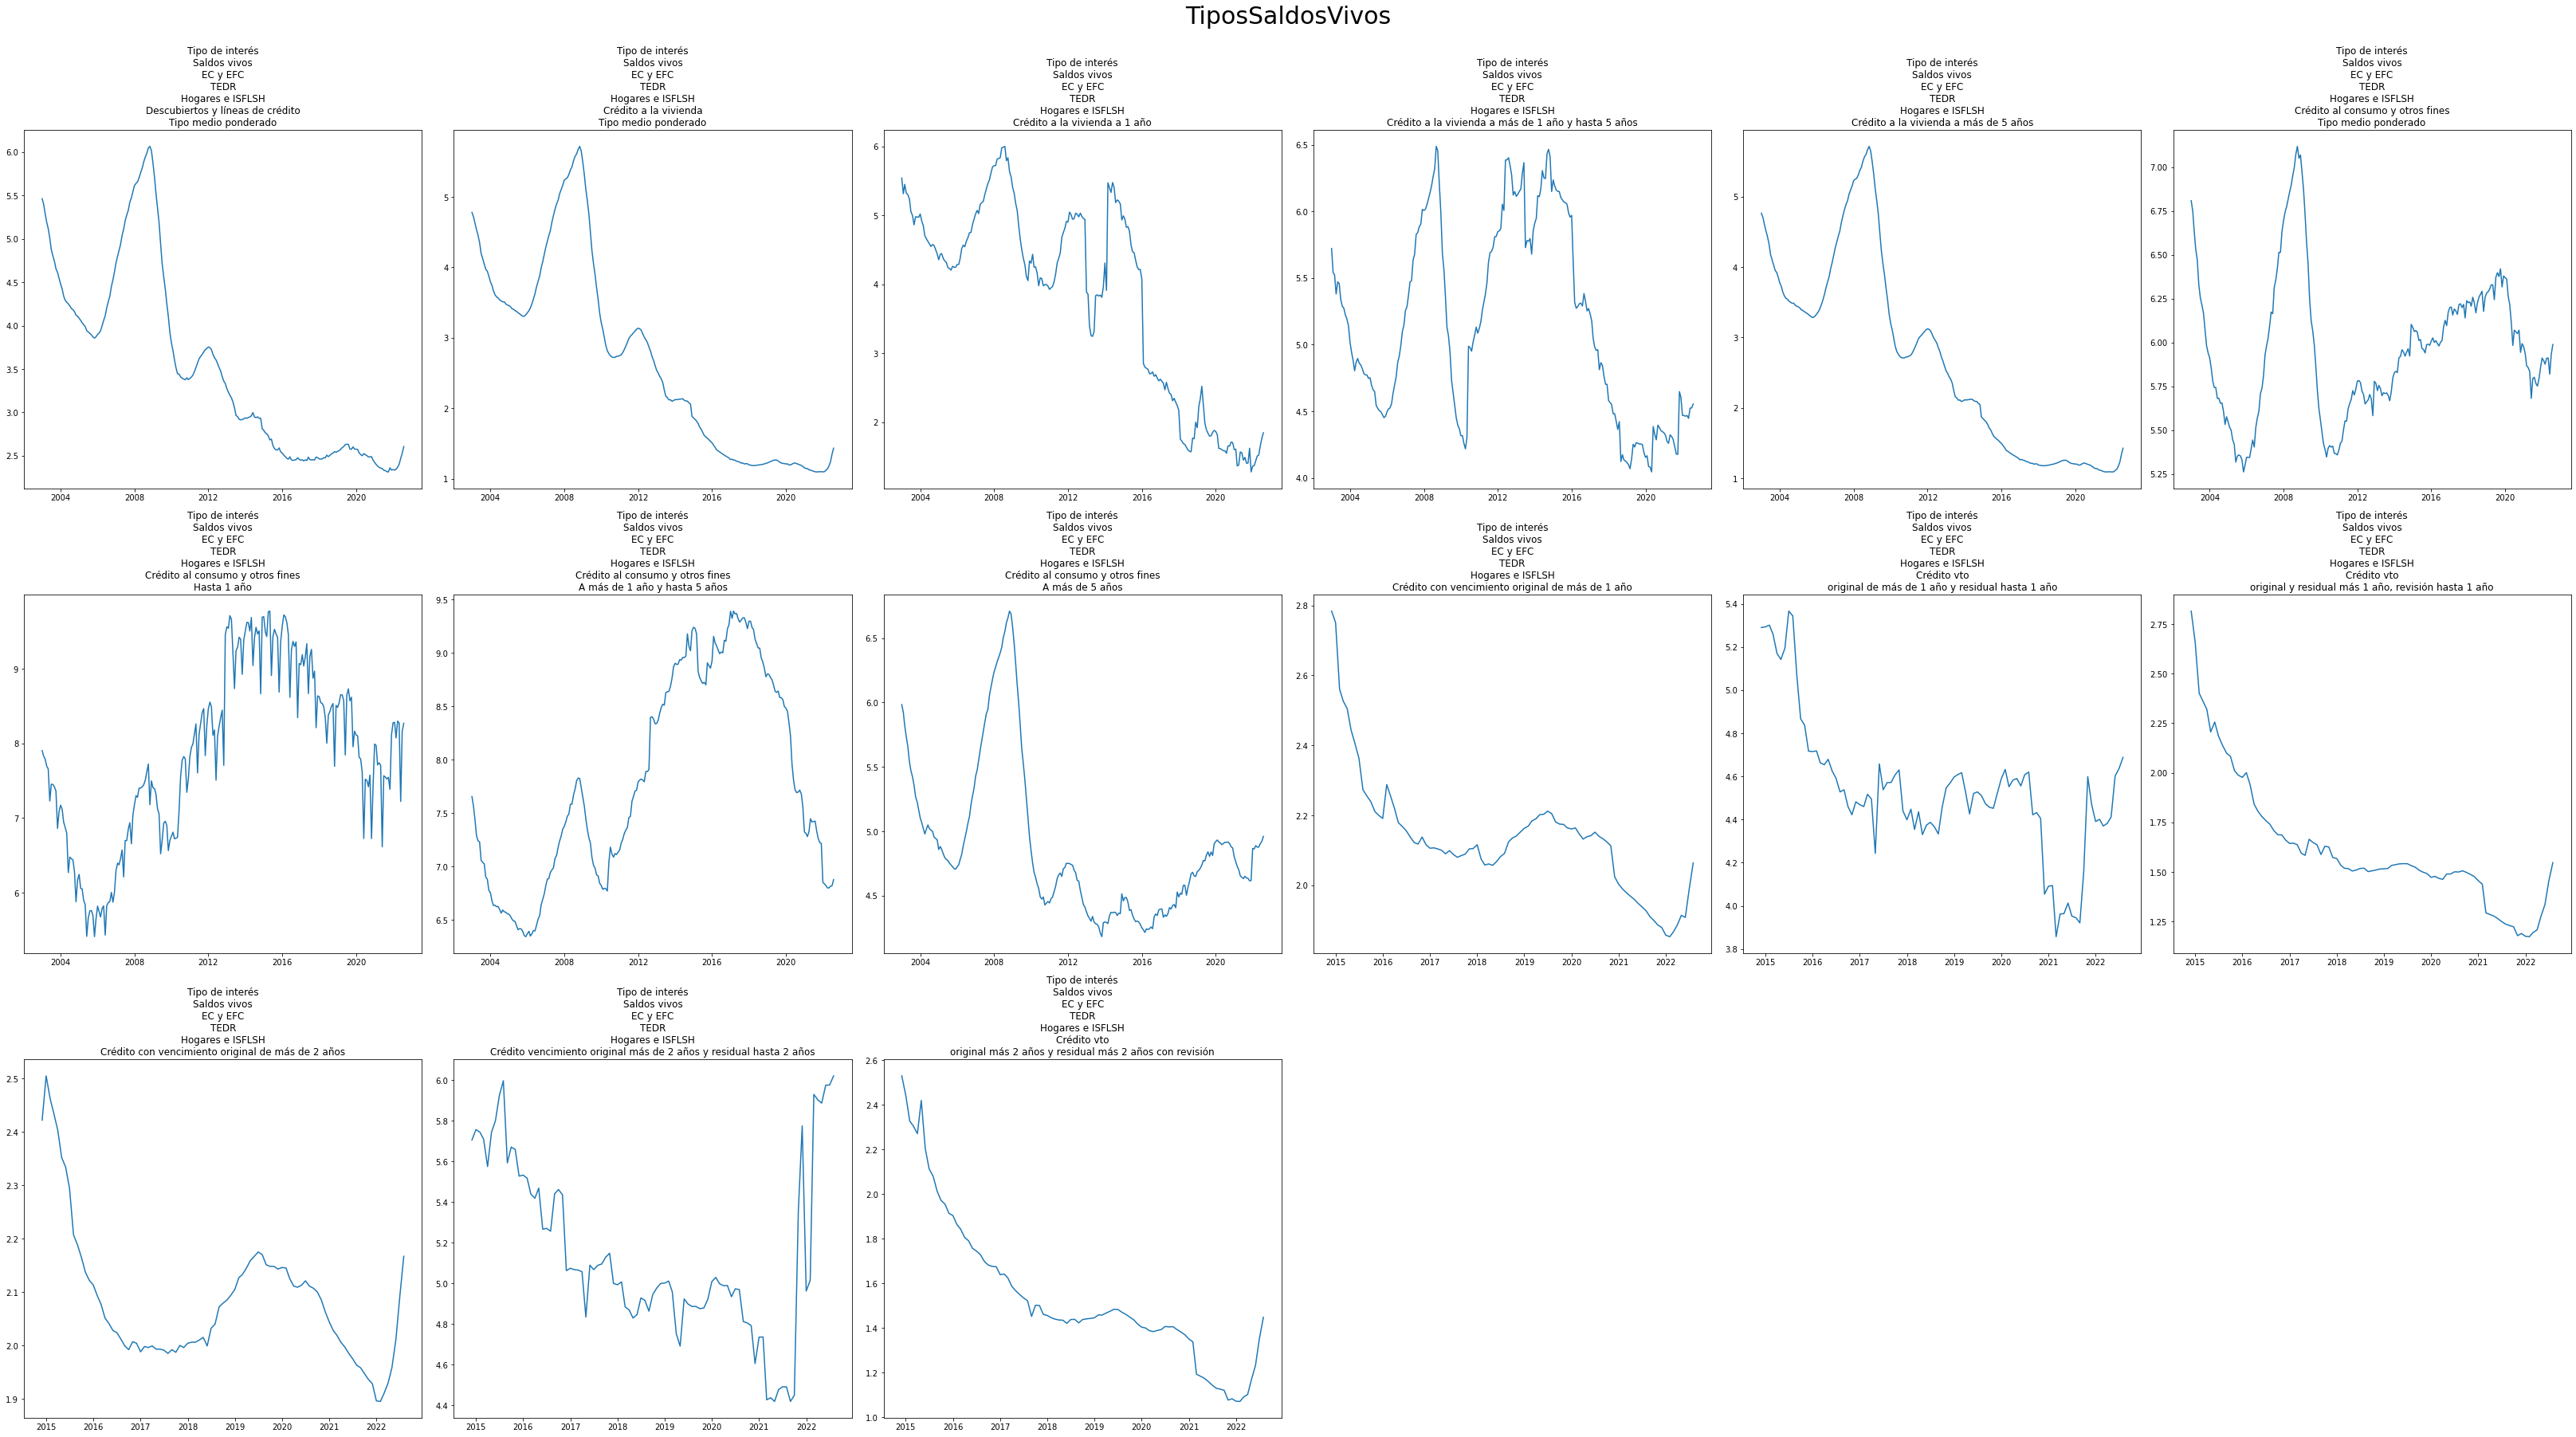

In [500]:
# Transform & Load
df = get_financial_df(con, 'TiposSaldosVivos')
grid_plot(df, x=df.index, columns=df.columns, width=25, table='TiposSaldosVivos')

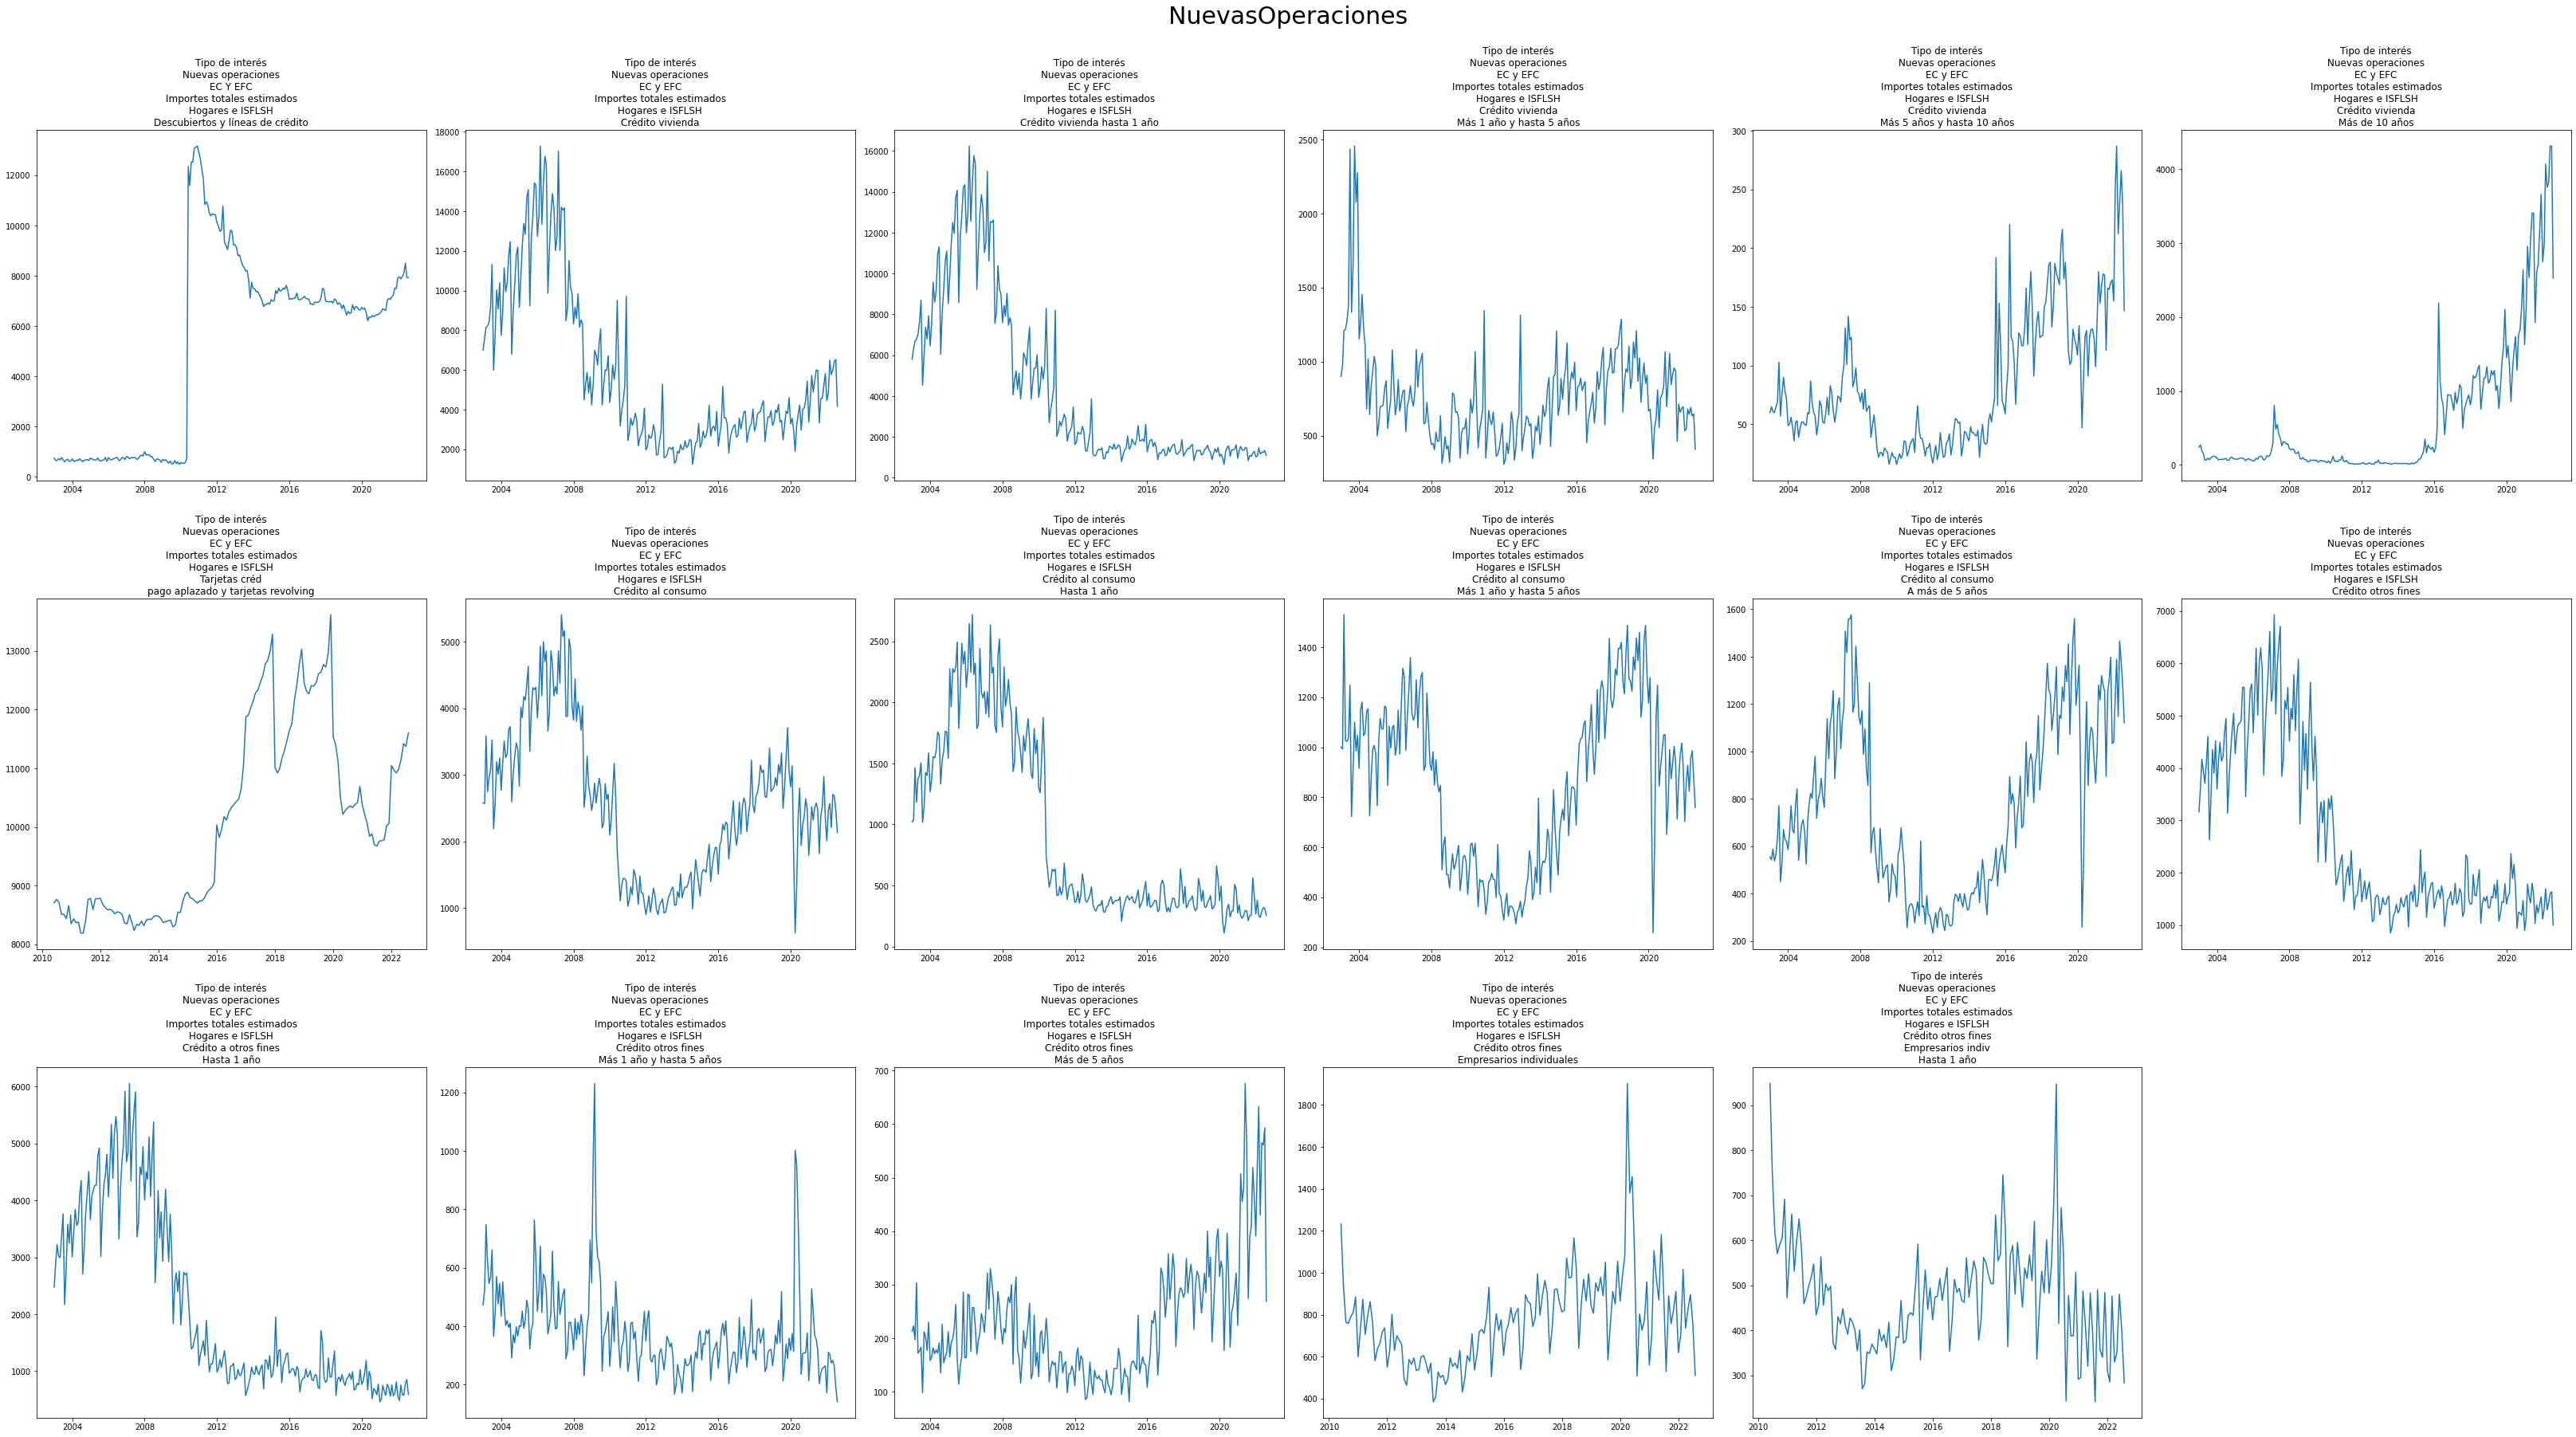

In [501]:
# Transform & Load
df = get_financial_df(con, 'NuevasOperaciones')
grid_plot(df, x=df.index, columns=df.columns, width=25, table='NuevasOperaciones')

# Create fact table with indicators data

In [29]:
pd.set_option("display.max_rows", 50)


In [85]:
column_names = pd.read_sql_query(f"SELECT * from Fact", con, index_col='index').columns

In [109]:
# column_names = column_names.to_list()
# column_names.append('Link')
column_names

['NombreSerie',
 'NumeroSecuencial',
 'AliasSerie',
 'DescripcionSerie',
 'DescripcionUnidades',
 'Frecuencia',
 'Fuente',
 'Notas',
 'Link']

In [108]:
# dfact = pd.read_sql_query(f"SELECT * from Fact", con, index_col='index')
# dfact

In [100]:
len(dfact.NombreSerie.unique()) == dfact.shape[0]

True

In [125]:
pub_link = 'https://www.bde.es/webbde/es/estadis/infoest/temas/sb_tiintref.html'
link = 'https://www.bde.es/webbde/es/estadis/infoest/series/be1901.csv'

df = pd.read_csv(link, encoding='ansi', header=None)
display(df.head(10))
display(df.tail(10))

0   \
0           NOMBRE DE LA SERIE   
1            NÚMERO SECUENCIAL   
2            ALIAS DE LA SERIE   
3      DESCRIPCIÓN DE LA SERIE   
4  DESCRIPCIÓN DE LAS UNIDADES   
5                   FRECUENCIA   
6                     ENE 1973   
7                     FEB 1973   
8                     MAR 1973   
9                     ABR 1973   

                                                  1   \
0                                         D_1NBAS972   
1                                            3975591   
2                                          BE_19_1.1   
3  MERCADO MONETARIO. TIPOS DE INTERES MERCADO IN...   
4                                         Porcentaje   
5                                            MENSUAL   
6                                                  _   
7                                                  _   
8                                                  _   
9                                                  _   

                                                  2   \
0                                         D_1NBAC972   
1                                            3975587   
2                                          BE_19_1.2   
3  MERCADO MONETARIO. TIPOS DE INTERES MERCADO IN...   
4                                         Porcentaje   
5                                            MENSUAL   
6                                                  _   
7                                                  _   
8                                                  _   
9                                                  _   

                                                  3   \
0                                         D_1NBAD972   
1                                            3975588   
2                                          BE_19_1.3   
3  MERCADO MONETARIO. TIPOS DE INTERES MERCADO IN...   
4                                         Porcentaje   
5                                            MENSUAL   
6                                                  _   
7                                                  _   
8                                                  _   
9                                                  _   

                                                  4   \
0                                         D_1NBAE972   
1                                            3975589   
2                                          BE_19_1.4   
3  MERCADO MONETARIO. TIPOS DE INTERES MERCADO IN...   
4                                         Porcentaje   
5                                            MENSUAL   
6                                                  _   
7                                                  _   
8                                                  _   
9                                                  _   

                                                  5   \
0                                         D_1NBAF472   
1                                             587853   
2                                          BE_19_1.5   
3  Tipo de interés. UEM. Mercado monetario. Euríb...   
4                                         Porcentaje   
5                                            MENSUAL   
6                                                  _   
7                                                  _   
8                                                  _   
9                                                  _   

                                              6   \
0                                     D_1NBAS572   
1                                        3984902   
2                                      BE_19_1.6   
3  Tipo de interés. UEM. Mercado monetario. ESTR   
4                                     Porcentaje   
5                                        MENSUAL   
6                                              _   
7                                              _   
8                                              _   
9                                              _

0                                                  1   \
595  FEB 2022                                             -0.571   
596  MAR 2022                                             -0.569   
597  ABR 2022                                             -0.569   
598  MAY 2022                                             -0.568   
599  JUN 2022                                             -0.570   
600  JUL 2022                                             -0.457   
601  AGO 2022                                             -0.071   
602  SEP 2022                                              0.424   
603    FUENTE         The European Money Market Institute (EMMI)   
604     NOTAS  Further information: https://www.emmi-benchmar...   

                                                    2   \
595                                             -0.553   
596                                             -0.544   
597                                             -0.537   
598                                             -0.546   
599                                             -0.525   
600                                             -0.306   
601                                              0.022   
602                                              0.574   
603         The European Money Market Institute (EMMI)   
604  Further information: https://www.emmi-benchmar...   

                                                    3   \
595                                             -0.532   
596                                             -0.495   
597                                             -0.448   
598                                             -0.386   
599                                             -0.239   
600                                              0.037   
601                                              0.395   
602                                              1.011   
603         The European Money Market Institute (EMMI)   
604  Further information: https://www.emmi-benchmar...   

                                                    4   \
595                                             -0.476   
596                                             -0.418   
597                                             -0.311   
598                                             -0.144   
599                                              0.162   
600                                              0.466   
601                                              0.837   
602                                              1.596   
603         The European Money Market Institute (EMMI)   
604  Further information: https://www.emmi-benchmar...   

                                                    5       6       7   \
595                                             -0.335  -0.575  -0.576   
596                                             -0.237  -0.580  -0.578   
597                                              0.013  -0.583  -0.584   
598                                              0.287  -0.586  -0.585   
599                                              0.852  -0.579  -0.582   
600                                              0.992  -0.440  -0.548   
601                                              1.249  -0.081  -0.085   
602                                              2.233   0.662   0.300   
603         The European Money Market Institute (EMMI)     NaN     NaN   
604  Further information: https://www.emmi-benchmar...     NaN     NaN   

         8       9   ...     24     25     26     27     28     29  \
595  -0.577  -0.573  ...  0.537  0.627  0.747  0.857  0.848  0.722   
596  -0.578  -0.575  ...  0.710  0.830  0.993  1.130  1.084  0.867   
597  -0.579  -0.577  ...  1.239  1.345  1.487  1.599  1.529  1.286   
598  -0.582  -0.579  ...  1.429  1.575  1.761  1.899  1.819  1.547   
599  -0.583  -0.580  ...  1.976  2.094  2.254  2.379  2.287  2.045   
600  -0.572  -0.575  ...  1.633  1.792  1.995  2.182  2.117  1.863   
601  -0.393  -0.487  ...  1.721  1.813  

In [138]:
df[13] == df[24]

0       True
1       True
2      False
3       True
4       True
       ...  
600     True
601     True
602     True
603    False
604    False
Length: 605, dtype: bool

In [142]:
pd.DataFrame({'x':df[13], 'y':df[24], 'z':df[13] == df[24]}).to_excel('test.xlsx')

In [143]:
dfact

NombreSerie NumeroSecuencial  AliasSerie  \
1       D_1NBAS972          3975591   BE_19_1.1   
2       D_1NBAC972          3975587   BE_19_1.2   
3       D_1NBAD972          3975588   BE_19_1.3   
4       D_1NBAE972          3975589   BE_19_1.4   
5       D_1NBAF472           587853   BE_19_1.5   
6       D_1NBAS572          3984902   BE_19_1.6   
7       D_1NBAC572          3984903   BE_19_1.7   
8       D_1NBAD572          3984904   BE_19_1.8   
9       D_1NBAE572          3984905   BE_19_1.9   
10      D_1NBAF572          3984906  BE_19_1.10   
11      D_1T9H0000           254828  BE_19_1.11   
12      D_1T9H0010          2149971  BE_19_1.12   
13      D_1T9H0011          2149972  BE_19_1.13   
14      D_1T9H0004           254832  BE_19_1.14   
15  D_1E723706.EUR           663721  BE_19_1.15   
16      D_1T9L0001           254838  BE_19_1.16   
17      D_1T9L0002           254839  BE_19_1.17   
18      D_1T9L0008           474026  BE_19_1.18   
19      D_1T9L0009          1159328  BE_19_1.19   
20      D_1T9VM001          2149961  BE_19_1.20   
21      D_1T9VM002          2149962  BE_19_1.21   
22      D_1T9VM003          2149963  BE_19_1.22   
23      D_1T9VM004          2149964  BE_19_1.23   
24      D_1T9H0011          2149972  BE_19_1.24   
25      D_1T9VM006          2149965  BE_19_1.25   
26      D_1T9VM007          2149966  BE_19_1.26   
27      D_1T9VM008          2149967  BE_19_1.27   
28      D_1T9VM009          2149968  BE_19_1.28   
29      D_1T9VM010          2149969  BE_19_1.29   
30    D_1TFECHABOE           806583  BE_19_1.30   
31   D_1TFECHABOE2           806583  BE_19_1.31   
32   D_1TFECHABOE4          2416630  BE_19_1.32   
33   D_1TFECHABOE3          2416630  BE_19_1.33   

                                     DescripcionSerie DescripcionUnidades  \
1   MERCADO MONETARIO. TIPOS DE INTERES MERCADO IN...          Porcentaje   
2   MERCADO MONETARIO. TIPOS DE INTERES MERCADO IN...          Porcentaje   
3   MERCADO MONETARIO. TIPOS DE INTERES MERCADO IN...          Porcentaje   
4   MERCADO MONETARIO. TIPOS DE INTERES MERCADO IN...          Porcentaje   
5   Tipo de interés. UEM. Mercado monetario. Euríb...          Porcentaje   
6       Tipo de interés. UEM. Mercado monetario. ESTR          Porcentaje   
7       Tipo de interés. UEM. Mercado monetario. ESTR          Porcentaje   
8       Tipo de interés. UEM. Mercado monetario. ESTR          Porcentaje   
9       Tipo de interés. UEM. Mercado monetario. ESTR          Porcentaje   
10      Tipo de interés. UEM. Mercado monetario. ESTR          Porcentaje   
11  Tipo de interés. De referencia. Oficiales. Mer...          Porcentaje   
12  Tipo de interés. De referencia. Oficiales. Mer...          Porcentaje   
13  Tipo de interés. De referencia. Oficiales. Mer...          Porcentaje   
14  Tipo de interés. De referencia. Oficiales. Mer...          Porcentaje   
15  Tipo de interés. De referencia. Oficiales. Mer...          Porcentaje   
16      Tipo de interés. Tipos legales. Interés legal          Porcentaje   
17  Tipo de interés. Tipos legales. interés Ley en...          Porcentaje   
18  Tipo de interés. Tipos legales. Interés de dem...          Porcentaje   
19  Tipo de interés. Tipos legales. Interés de dem...          Porcentaje   
20  Tipo de interés. De referencia. Préstamos hipo...          Porcentaje   
21  Tipo de interés. De referencia. Préstamos hipo...          Porcentaje   
22  Tipo de interés. De referencia. Préstamos hipo...          Porcentaje   
23  Tipo de interés. De referencia. Préstamos hipo...          Porcentaje   
24  Tipo de interés. De referencia. Oficiales. Mer...          Porcentaje   
25  Tipo de interés. De referencia. Préstamos hipo...          Porcentaje   
26  Tipo de interés. De referencia. Préstamos hipo...          Porcentaje   
27  Tipo de interés. De referencia. Préstamos hipo...          Porcentaje   
28  Tipo de interés. De referencia. Préstamos hipo...          Porcentaje   
29  Tipo de interés. De referencia. Pré

In [144]:
dfact = pd.concat([df.head(6), df.tail(2)])
dfact = dfact.T
dfact.drop(0, inplace=True)
dfact['Link'] = pub_link
dfact.columns = column_names
print(len(dfact.NombreSerie.unique()) == dfact.shape[0])

False


In [145]:
dfact.to_sql('Fact', con, if_exists='append')

33

In [73]:
con.close()

In [165]:
df = pd.read_csv('https://www.bde.es/webbde/es/estadis/infoest/series/tc_1_1.csv', encoding='ansi')

df.loc[3,'NOMBRE DE LA SERIE'] = 'fecha'
df.loc[3] = df.loc[3].str.replace(' por ','/')

df.columns = df.loc[3]
df = df[5:-2]

df.fecha = df.fecha.replace(months,regex=True)
df.fecha = pd.to_datetime(df.fecha, format='%d %m %Y')
df = df.set_index(keys=df.fecha)
df.drop(columns='fecha', inplace=True)
# df = df.loc['2006-01-01':]                                  # 2005-07-01 Rumanía reemplaza ROL por RON con tipo de cambio 1/10.000 https://www.cambioeuro.es/leu-rumano/
df = df.replace('_',math.nan)
df = df.astype(float)
df.interpolate(method='time', inplace=True)

In [152]:
df

3           Dólares de Estados Unidos/Euro  Yenes japoneses/Euro  \
fecha                                                              
1999-01-04                          1.1789                133.73   
1999-01-05                          1.1790                130.96   
1999-01-06                          1.1743                131.42   
1999-01-07                          1.1632                129.43   
1999-01-08                          1.1659                130.09   
...                                    ...                   ...   
2022-10-24                          0.9851                146.76   
2022-10-25                          0.9861                146.84   
2022-10-26                          1.0023                147.32   
2022-10-27                          1.0037                147.37   
2022-10-28                          0.9951                146.79   

3           Francos suizos/Euro  Libras esterlinas/Euro  Leva búlgaros/Euro  \
fecha                                                                         
1999-01-04               1.6168                 0.71110                 NaN   
1999-01-05               1.6123                 0.71220                 NaN   
1999-01-06               1.6116                 0.70760                 NaN   
1999-01-07               1.6165                 0.70585                 NaN   
1999-01-08               1.6138                 0.70940                 NaN   
...                         ...                     ...                 ...   
2022-10-24               0.9856                 0.87070              1.9558   
2022-10-25               0.9888                 0.87143              1.9558   
2022-10-26               0.9917                 0.86603              1.9558   
2022-10-27               0.9949                 0.86745              1.9558   
2022-10-28               0.9920                 0.86120              1.9558   

3           Coronas checas/Euro  Coronas danesas/Euro  Forints húngaros/Euro  \
fecha                                                                          
1999-01-04               35.107                7.4501                 251.48   
1999-01-05               34.917                7.4495                 250.80   
1999-01-06               34.850                7.4452                 250.67   
1999-01-07               34.886                7.4431                 250.09   
1999-01-08               34.938                7.4433                 250.15   
...                         ...                   ...                    ...   
2022-10-24               24.482                7.4385                 411.88   
2022-10-25               24.472                7.4387                 413.70   
2022-10-26               24.535                7.4381                 408.09   
2022-10-27               24.530                7.4387                 412.15   
2022-10-28               24.465                7.4423                 411.70   

3           SDR (Derechos especiales de giro)/Euro  Zlotys polacos/Euro  ...  \
fecha                                                                    ...   
1999-01-04                                  0.8356               4.0712  ...   
1999-01-05                                  0.8325               4.0245  ...   
1999-01-06                                  0.8306               4.0065  ...   
1999-01-07                                  0.8246               4.0165  ...   
1999-01-08                                  0.8283               4.0363  ...   
...                                            ...                  ...  ...   
2022-10-24                                  0.7705               4.7908  ...   
2022-10-25                                  0.7717               4.7770  ...   
2022-10-26                                  0.7767               4.7548  ...   
2022-10-27                                  0.7780               4.7585  ...   
2022-10-28                                  0.7780               4.7275  ...   

3    

In [157]:
df.columns

Index(['Dólares de Estados Unidos/Euro', 'Yenes japoneses/Euro',
       'Francos suizos/Euro', 'Libras esterlinas/Euro', 'Leva búlgaros/Euro',
       'Coronas checas/Euro', 'Coronas danesas/Euro', 'Forints húngaros/Euro',
       'SDR (Derechos especiales de giro)/Euro', 'Zlotys polacos/Euro',
       'Lei rumanos/Euro', 'Coronas suecas/Euro', 'Coronas islandesas/Euro',
       'Coronas noruegas/Euro', 'Kunas/Euro', 'Rublos rusos/Euro',
       'Liras turcas/Euro', 'Dólares australianos/Euro',
       'Reales brasileños/Euro', 'Dólares canadienses/Euro', 'Yuans/Euro',
       'Dólares de Hong Kong/Euro', 'Rupias indonesias/Euro',
       'nuevos sheqalim israelíes/euro', 'Rupias indias/euro',
       'Wons surcoreanos/Euro', 'Pesos mejicanos/Euro', 'Ringgits malayo/Euro',
       'Dólares neozelandeses/Euro', 'Pesos filipinos/Euro',
       'Dólares de Singapur/Euro', 'Bahts de tailandia/Euro',
       'Rands sudafricanos/Euro'],
      dtype='object', name=3)

<AxesSubplot:xlabel='fecha'>

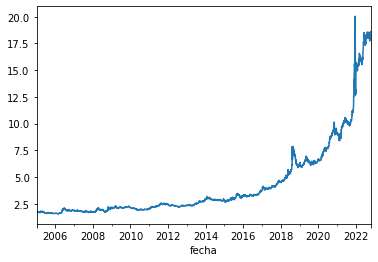

In [170]:
df.loc['2005-01-01':, 'Liras turcas/Euro'].plot()

<AxesSubplot:xlabel='fecha'>

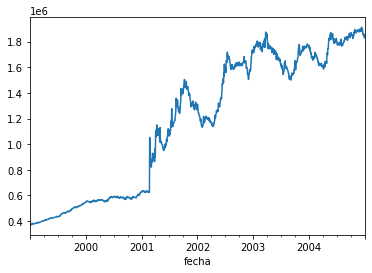

In [171]:
df.loc[:'2005-01-01', 'Liras turcas/Euro'].plot()

<AxesSubplot:xlabel='fecha'>

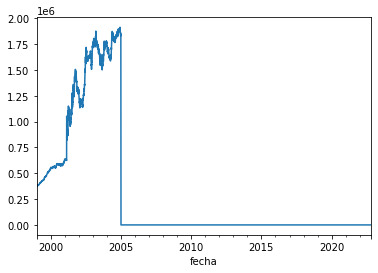

In [173]:
df['Liras turcas/Euro'].plot()